# now do some ML using the web scraped data

In [501]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [502]:
from player_data_expansion import get_all_expanded_player_fight_data

In [503]:
# AWS integration getting file data
df_init = pd.read_csv("fight_data.csv").fillna(pd.NA)

In [504]:
df_init.head()

,Date,fighter1,fighter1_result,method_or_round,fighter2,Venue,Undercard fights,link,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
0,"Sunday, 4 May 2025",Naoya Inoue,Winner,"TKO, Round 8",Ramon Cardenas,"T-Mobile Arena, Las Vegas, United States",Rafael Espinoza Beat Edward Vazquez (TKO 7) \...,https://box.live/fights/inoue-vs-cardenas/,29,0,0,26,0,1,164,168.0,0,0,2012,2015
1,"Saturday, 3 May 2025",Canelo Alvarez,Winner,"UD, Round 12",William Scull,"The Venue, Riyadh, Saudi Arabia",Jaime Munguia Beat Bruno Surace (UD 12) \nMar...,https://box.live/fights/canelo-vs-scull/,62,2,2,23,0,0,175,182.0,0,0,2005,2016
2,"Saturday, 3 May 2025",Jukiya Iimura,Winner,"UD, Round 12",Esneth Domingo,"Korakuen Hall, Tokyo, Japan",<NA>,https://box.live/fights/iimura-vs-domingo/,8,0,1,21,0,2,164,160.0,0,0,2021,2015
3,"Friday, 2 May 2025",Ryan Garcia,Loser,"UD, Round 12",Rolando ‘Rolly’ Romero,"Times Square, New York, NY, United States",Devin Haney Beat Jose Ramirez (UD 12) \nTeofi...,https://box.live/fights/garcia-vs-romero/,24,0,1,16,0,2,178,173.0,83,81,2016,2016
4,"Thursday, 1 May 2025",Kevin Lerena,Winner,"TKO, Round 3",Serhiy Radchenko,"Sunbet Arena, Pretoria, South Africa",<NA>,https://box.live/fights/lerena-vs-radchenko/,30,0,3,11,0,7,185,186.0,47,45,2011,2014


In [505]:
df_init.tail(10)

,Date,fighter1,fighter1_result,method_or_round,fighter2,Venue,Undercard fights,link,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
23,"Saturday, 10 May 2025",Erickson Lubin,Winner,"TKO, Round 11",Ardreal Holmes,"Silver Spurs Arena, Kissimmee, FL, United States",Mayeli Flores Beat Nazarena Romero (SD 10),https://box.live/fights/lubin-vs-holmes/,26,0,2,17,0,0,180,188.0,69,35,2013,2016
24,"Saturday, 10 May 2025",Emanuel Navarrete,Winner,"TD, Round 8",Charly Suarez,"Pechanga Arena, San Diego, CA, United States",Raymond Muratalla Beat Zaur Abdullaev (UD 12)...,https://box.live/fights/navarrete-vs-suarez/,39,1,2,18,0,0,170,168.0,82,56,2012,2019
25,"Saturday, 10 May 2025",Souleymane Cissokho,Winner,"UD, Round 12",Egidijus Kavaliauskas,"Centre de Conference de Sipopo, Malabo, Equato...",Kevin Sadjo Beat Habib Ahmed (KO 3),https://box.live/fights/cissokho-vs-kavaliauskas/,17,0,0,24,1,2,179,175.0,53,79,1991,2013
26,"Friday, 9 May 2025",Dainier Pero,Winner,"UD, Round 10",Cesar Navarro,"Caribe Royale Orlando, Orlando, FL, United States",<NA>,https://box.live/fights/pero-vs-navarro/,10,0,0,13,0,2,188,183.0,80,85,2012,2017
27,"Friday, 9 May 2025",Tommy Fury,Winner,"UD, Round 6",Kenan Hanjalic,"MTK Arena, Budapest, Hungary",Roman Fury Beat Josip Pehar (TKO 4),https://box.live/fights/fury-vs-hanjalic/,10,0,0,5,0,1,183,NaN,40,80,2018,2019
28,"Friday, 9 May 2025",Andreas Katzourakis,Winner,"TKO, Round 7",Roberto Cruz,"Red Owl Boxing Arena, Houston, TX, United States",<NA>,https://box.live/fights/katzourakis-vs-cruz/,15,0,0,11,0,0,178,175.0,0,0,2018,2016
29,"Sunday, 4 May 2025",Naoya Inoue,Winner,"TKO, Round 8",Ramon Cardenas,"T-Mobile Arena, Las Vegas, United States",Rafael Espinoza Beat Edward Vazquez (TKO 7) \...,https://box.live/fights/inoue-vs-cardenas/,29,0,0,26,0,1,164,165.0,0,0,2012,2015
30,"Saturday, 3 May 2025",Canelo Alvarez,Winner,"UD, Round 12",William Scull,"The Venue, Riyadh, Saudi Arabia",Jaime Munguia Beat Bruno Surace (UD 12) \nMar...,https://box.live/fights/canelo-vs-scull/,62,2,2,23,0,0,175,182.0,0,0,2005,2016
31,"Saturday, 3 May 2025",Jukiya Iimura,Winner,"UD, Round 12",Esneth Domingo,"Korakuen Hall, Tokyo, Japan",<NA>,https://box.live/fights/iimura-vs-domingo/,8,0,1,21,0,2,164,160.0,0,0,2021,2015
32,"Friday, 2 May 2025",Ryan Garcia,Loser,"UD, Round 12",Rolando ‘Rolly’ Romero,"Times Square, New York, NY, United States",Devin Haney Beat Jose Ramirez (UD 12) \nTeofi...,https://box.live/fights/garcia-vs-romero/,24,0,1,16,0,2,178,173.0,83,81,2016,2016


In [506]:
# ADD BASIC DATA TO SEE IF IT WORKS
df_init = pd.concat([df_init,pd.read_csv("fight_data_backup_basic.csv")], axis=0)
df_init.drop_duplicates(inplace=True)

### start cleaning

In [507]:
df_essentials = df_init.drop(columns=['link','Venue','Date','Undercard fights','fighter1','fighter2'])
df_essentials.head(2)

,fighter1_result,method_or_round,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
0,Winner,"TKO, Round 8",29.0,0.0,0.0,26.0,0.0,1.0,164.0,168.0,0.0,0.0,2012.0,2015.0
1,Winner,"UD, Round 12",62.0,2.0,2.0,23.0,0.0,0.0,175.0,182.0,0.0,0.0,2005.0,2016.0


In [508]:
df_staged_cleaning = df_essentials.copy()
df_staged_cleaning.head(2)

,fighter1_result,method_or_round,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
0,Winner,"TKO, Round 8",29.0,0.0,0.0,26.0,0.0,1.0,164.0,168.0,0.0,0.0,2012.0,2015.0
1,Winner,"UD, Round 12",62.0,2.0,2.0,23.0,0.0,0.0,175.0,182.0,0.0,0.0,2005.0,2016.0


In [509]:
df_staged_cleaning['method_or_round'] = df_staged_cleaning['method_or_round'].str.split(' ')

In [510]:
last_rounds = [new_list[2] for new_list in df_staged_cleaning['method_or_round']][:]
# df_staged_cleaning['round'] = last_rounds round includes test bias

df_staged_cleaning.head()

,fighter1_result,method_or_round,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
0,Winner,"[TKO,, Round, 8]",29.0,0.0,0.0,26.0,0.0,1.0,164.0,168.0,0.0,0.0,2012.0,2015.0
1,Winner,"[UD,, Round, 12]",62.0,2.0,2.0,23.0,0.0,0.0,175.0,182.0,0.0,0.0,2005.0,2016.0
2,Winner,"[UD,, Round, 12]",8.0,0.0,1.0,21.0,0.0,2.0,164.0,160.0,0.0,0.0,2021.0,2015.0
3,Loser,"[UD,, Round, 12]",24.0,0.0,1.0,16.0,0.0,2.0,178.0,173.0,83.0,81.0,2016.0,2016.0
4,Winner,"[TKO,, Round, 3]",30.0,0.0,3.0,11.0,0.0,7.0,185.0,186.0,47.0,45.0,2011.0,2014.0


In [511]:
df_staged_cleaning = df_staged_cleaning.drop(columns='method_or_round')
df_staged_cleaning.head()

,fighter1_result,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
0,Winner,29.0,0.0,0.0,26.0,0.0,1.0,164.0,168.0,0.0,0.0,2012.0,2015.0
1,Winner,62.0,2.0,2.0,23.0,0.0,0.0,175.0,182.0,0.0,0.0,2005.0,2016.0
2,Winner,8.0,0.0,1.0,21.0,0.0,2.0,164.0,160.0,0.0,0.0,2021.0,2015.0
3,Loser,24.0,0.0,1.0,16.0,0.0,2.0,178.0,173.0,83.0,81.0,2016.0,2016.0
4,Winner,30.0,0.0,3.0,11.0,0.0,7.0,185.0,186.0,47.0,45.0,2011.0,2014.0


### feature engineering swapped values + add to current values

In [512]:

df_staged_swapping = df_staged_cleaning.copy()

fighter2_wins_temp = df_staged_swapping['fighter2_record_wins'].copy()
fighter2_draws_temp = df_staged_swapping['fighter2_record_draws'].copy()
fighter2_losses_temp = df_staged_swapping['fighter2_record_losses'].copy()
fighter2_height_cm_temp = df_staged_swapping['fighter2_height_cm'].copy()
fighter2_ko_percentage_temp = df_staged_swapping['fighter2_ko_percentage'].copy()
fighter2_debut_temp = df_staged_swapping['fighter2_debut'].copy()

df_staged_swapping['fighter2_record_wins'] = df_staged_swapping['fighter1_record_wins']
df_staged_swapping['fighter2_record_draws'] = df_staged_swapping['fighter1_record_draws']
df_staged_swapping['fighter2_record_losses'] = df_staged_swapping['fighter1_record_losses']
df_staged_swapping['fighter2_height_cm'] = df_staged_swapping['fighter1_height_cm']
df_staged_swapping['fighter2_ko_percentage'] = df_staged_swapping['fighter1_ko_percentage']
df_staged_swapping['fighter2_debut'] = df_staged_swapping['fighter1_debut']

df_staged_swapping['fighter1_record_wins'] = fighter2_wins_temp
df_staged_swapping['fighter1_record_draws'] = fighter2_draws_temp
df_staged_swapping['fighter1_record_losses'] = fighter2_losses_temp
df_staged_swapping['fighter1_height_cm'] = fighter2_height_cm_temp
df_staged_swapping['fighter1_ko_percentage'] = fighter2_ko_percentage_temp
df_staged_swapping['fighter1_debut'] = fighter2_debut_temp



def reverse_results(rowval) : 
    if rowval == 'Winner' :
        return 'Loser'
    elif rowval == 'Loser' :
        return 'Winner'
    else :
        return 'Draw'
    
df_staged_swapping['fighter1_result'] = df_staged_swapping['fighter1_result'].apply(reverse_results)


concatenate the matrices

In [513]:
# df_encoded = pd.concat([df_staged_cleaning, df_staged_swapping], axis=0)
# df_encoded

could also feature engineer the ratio between fighters, such as fighter2/fighter1 for height

### encoding

In [514]:
# commented out. this is the original with no swapping
df_encoded = df_staged_cleaning.copy()

In [515]:
# WINNER = 0, LOSER = 1, DRAW = 2
def custom_encoder(value) :
    if value == 'Winner' :
        return 0
    elif value == 'Loser' :
        return 1
    else : return 2
df_encoded['fighter1_result'] = df_encoded['fighter1_result'].apply(custom_encoder)

In [516]:
df_encoded.shape

(33, 13)

In [517]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 11
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fighter1_result         33 non-null     int64  
 1   fighter1_record_wins    21 non-null     float64
 2   fighter1_record_draws   21 non-null     float64
 3   fighter1_record_losses  21 non-null     float64
 4   fighter2_record_wins    21 non-null     float64
 5   fighter2_record_draws   21 non-null     float64
 6   fighter2_record_losses  21 non-null     float64
 7   fighter1_height_cm      21 non-null     float64
 8   fighter2_height_cm      19 non-null     float64
 9   fighter1_ko_percentage  21 non-null     float64
 10  fighter2_ko_percentage  21 non-null     float64
 11  fighter1_debut          21 non-null     float64
 12  fighter2_debut          21 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 3.6 KB


In [518]:
df_encoded = df_encoded.infer_objects()

df_encoded['fighter1_result'] = df_encoded['fighter1_result'].astype('category')

df_encoded['fighter1_record_wins'] = df_encoded['fighter1_record_wins'].astype('Int64')
df_encoded['fighter1_record_draws'] = df_encoded['fighter1_record_draws'].astype('Int64')
df_encoded['fighter1_record_losses'] = df_encoded['fighter1_record_losses'].astype('Int64')
df_encoded['fighter2_record_wins'] = df_encoded['fighter2_record_wins'].astype('Int64')
df_encoded['fighter2_record_draws'] = df_encoded['fighter2_record_draws'].astype('Int64')
df_encoded['fighter2_record_losses'] = df_encoded['fighter1_record_losses'].astype('Int64')
df_encoded['fighter1_height_cm'] = df_encoded['fighter2_height_cm'].astype('Int64')
df_encoded['fighter2_height_cm'] = df_encoded['fighter2_height_cm'].astype('Int64')
df_encoded['fighter1_ko_percentage'] = df_encoded['fighter1_ko_percentage'].astype('Int64')
df_encoded['fighter2_ko_percentage'] = df_encoded['fighter2_ko_percentage'].astype('Int64')
# df_encoded['round'] = df_encoded['round'].astype('Int64') round includes test bias
df_encoded['fighter1_debut'] = df_encoded['fighter1_debut'].astype('Int64')
df_encoded['fighter2_debut'] = df_encoded['fighter1_debut'].astype('Int64')

In [519]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 11
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   fighter1_result         33 non-null     category
 1   fighter1_record_wins    21 non-null     Int64   
 2   fighter1_record_draws   21 non-null     Int64   
 3   fighter1_record_losses  21 non-null     Int64   
 4   fighter2_record_wins    21 non-null     Int64   
 5   fighter2_record_draws   21 non-null     Int64   
 6   fighter2_record_losses  21 non-null     Int64   
 7   fighter1_height_cm      19 non-null     Int64   
 8   fighter2_height_cm      19 non-null     Int64   
 9   fighter1_ko_percentage  21 non-null     Int64   
 10  fighter2_ko_percentage  21 non-null     Int64   
 11  fighter1_debut          21 non-null     Int64   
 12  fighter2_debut          21 non-null     Int64   
dtypes: Int64(12), category(1)
memory usage: 3.9 KB


In [520]:
df_encoded.describe()

,fighter1_record_wins,fighter1_record_draws,fighter1_record_losses,fighter2_record_wins,fighter2_record_draws,fighter2_record_losses,fighter1_height_cm,fighter2_height_cm,fighter1_ko_percentage,fighter2_ko_percentage,fighter1_debut,fighter2_debut
count,21.0,21.0,21.0,21.0,21.0,21.0,19.0,19.0,21.0,21.0,21.0,21.0
mean,23.904762,0.238095,1.142857,20.047619,0.285714,1.142857,173.842105,173.842105,33.761905,32.619048,2013.238095,2013.238095
std,13.228397,0.538958,1.525966,6.484414,0.46291,1.525966,8.858537,8.858537,35.365103,34.08882,6.876807,6.876807
min,8.0,0.0,0.0,5.0,0.0,0.0,160.0,160.0,0.0,0.0,1991.0,1991.0
25%,15.0,0.0,0.0,16.0,0.0,0.0,167.0,167.0,0.0,0.0,2011.0,2011.0
50%,23.0,0.0,0.0,22.0,0.0,0.0,173.0,173.0,35.0,35.0,2012.0,2012.0
75%,30.0,0.0,2.0,24.0,1.0,2.0,182.5,182.5,69.0,61.0,2018.0,2018.0
max,62.0,2.0,5.0,31.0,1.0,5.0,188.0,188.0,83.0,85.0,2022.0,2022.0


### tt split

In [521]:
from sklearn.model_selection import train_test_split

In [522]:
X = df_encoded.drop(columns=['fighter1_result', "fighter1_ko_percentage", 'fighter2_ko_percentage'])
y = df_encoded['fighter1_result']
y.unique()

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

In [523]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80) # tweak to maker sure that y values contain wins, losses, and draws. ts = .2 and rs =  66
print(y_train.unique())
print(y_test.unique())

[0, 1, 2]
Categories (3, int64): [0, 1, 2]
[0, 2]
Categories (3, int64): [0, 1, 2]


## TRAIN MODEL - XGBoost First

In [524]:
from xgboost import XGBClassifier

In [525]:
xgbc = XGBClassifier(
    objective='multi:softmax',
    random_state=42,
    num_class=3,
    verbosity=1
)

In [526]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [527]:
y_train = encoder.fit_transform(y_train)

In [528]:
# compute sample weight based on class frequency
class_weights = dict(enumerate(len(y_train) / (len(np.unique(y_train)) * np.bincount(y_train))))
sample_weight = np.array([class_weights[label] for label in y_train])
sample_weight

array([0.36507937, 0.36507937, 0.36507937, 0.36507937, 0.36507937,
       0.36507937, 0.36507937, 0.36507937, 0.36507937, 0.36507937,
       0.36507937, 0.36507937, 0.36507937, 0.36507937, 0.36507937,
       0.36507937, 0.36507937, 0.36507937, 0.36507937, 7.66666667,
       0.36507937, 7.66666667, 0.36507937])

In [529]:
# # no class weighting
# xgbc.fit(X_train, y_train)

# class weighting
xgbc.fit(X_train, y_train, sample_weight=sample_weight)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, ...)

In [530]:
xgbc_preds = xgbc.predict(X_test)
xgbc_preds = encoder.inverse_transform(xgbc_preds)

In [531]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [532]:
print(accuracy_score(y_test, xgbc_preds))

0.6


In [533]:
print(confusion_matrix(y_test, xgbc_preds))

[[6 1 2]
 [0 0 0]
 [1 0 0]]


In [534]:
print(classification_report(y_test, xgbc_preds))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75         9
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1

    accuracy                           0.60        10
   macro avg       0.29      0.22      0.25        10
weighted avg       0.77      0.60      0.68        10



c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [535]:
xgbc_preds

array([0, 2, 0, 0, 1, 0, 0, 2, 0, 0], dtype=int64)

### grid search cross validated + XGBoost Classifier - same rseult as initial one

In [536]:
from sklearn.model_selection import GridSearchCV

In [537]:
eval_set = [(X, y)] # validation set for early stopping

In [538]:
xgbc_model2 = XGBClassifier(
    objective='multi:softmax',
    random_state=42,
    num_class=3,
    verbosity=1,
    eval_metric="mlogloss"
)

In [539]:
param_grid = {
    "subsample":[0.75, 1],
     "colsample_bytree":[0.75, 1],
     "max_depth":[2, 6],
     "min_child_weight":[1, 2,3],
     "learning_rate":[1, 0.1, 0.01],
}

In [540]:
xgbc_grid = GridSearchCV(
    xgbc_model2,
    param_grid,
    cv=3,
    scoring="f1"
)

In [541]:
xgbc_grid.fit(X_train,y_train,eval_set=eval_set,verbose=1)

[0]	validation_0-mlogloss:0.47953
[1]	validation_0-mlogloss:0.38960
[2]	validation_0-mlogloss:0.38155
[3]	validation_0-mlogloss:0.39405
[4]	validation_0-mlogloss:0.37092
[5]	validation_0-mlogloss:0.36740
[6]	validation_0-mlogloss:0.36787
[7]	validation_0-mlogloss:0.36898
[8]	validation_0-mlogloss:0.37180
[9]	validation_0-mlogloss:0.37166
[10]	validation_0-mlogloss:0.37896
[11]	validation_0-mlogloss:0.37683
[12]	validation_0-mlogloss:0.37869
[13]	validation_0-mlogloss:0.38180
[14]	validation_0-mlogloss:0.38443
[15]	validation_0-mlogloss:0.38870
[16]	validation_0-mlogloss:0.38904
[17]	validation_0-mlogloss:0.39277
[18]	validation_0-mlogloss:0.39534
[19]	validation_0-mlogloss:0.39508
[20]	validation_0-mlogloss:0.39970
[21]	validation_0-mlogloss:0.40176
[22]	validation_0-mlogloss:0.40900
[23]	validation_0-mlogloss:0.40900
[24]	validation_0-mlogloss:0.41094
[25]	validation_0-mlogloss:0.41704
[26]	validation_0-mlogloss:0.42154
[27]	validation_0-mlogloss:0.42248
[28]	validation_0-mlogloss:0.4

[31]	validation_0-mlogloss:0.43207
[32]	validation_0-mlogloss:0.44094
[33]	validation_0-mlogloss:0.44169
[34]	validation_0-mlogloss:0.44348
[35]	validation_0-mlogloss:0.44446
[36]	validation_0-mlogloss:0.44836
[37]	validation_0-mlogloss:0.45218
[38]	validation_0-mlogloss:0.45216
[39]	validation_0-mlogloss:0.45755
[40]	validation_0-mlogloss:0.45559
[41]	validation_0-mlogloss:0.45757
[42]	validation_0-mlogloss:0.46012
[43]	validation_0-mlogloss:0.46691
[44]	validation_0-mlogloss:0.46928
[45]	validation_0-mlogloss:0.45780
[46]	validation_0-mlogloss:0.45780
[47]	validation_0-mlogloss:0.45980
[48]	validation_0-mlogloss:0.45963
[49]	validation_0-mlogloss:0.46073
[50]	validation_0-mlogloss:0.46846
[51]	validation_0-mlogloss:0.46851
[52]	validation_0-mlogloss:0.46823
[53]	validation_0-mlogloss:0.46956


c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[54]	validation_0-mlogloss:0.47020
[55]	validation_0-mlogloss:0.47353
[56]	validation_0-mlogloss:0.47590
[57]	validation_0-mlogloss:0.45984
[58]	validation_0-mlogloss:0.47208
[59]	validation_0-mlogloss:0.47595
[60]	validation_0-mlogloss:0.48254
[61]	validation_0-mlogloss:0.48092
[62]	validation_0-mlogloss:0.47059
[63]	validation_0-mlogloss:0.47196
[64]	validation_0-mlogloss:0.47374
[65]	validation_0-mlogloss:0.48436
[66]	validation_0-mlogloss:0.48641
[67]	validation_0-mlogloss:0.49000
[68]	validation_0-mlogloss:0.49708
[69]	validation_0-mlogloss:0.50415
[70]	validation_0-mlogloss:0.50416
[71]	validation_0-mlogloss:0.50534
[72]	validation_0-mlogloss:0.50529
[73]	validation_0-mlogloss:0.50529
[74]	validation_0-mlogloss:0.50564
[75]	validation_0-mlogloss:0.50653
[76]	validation_0-mlogloss:0.50929
[77]	validation_0-mlogloss:0.51195
[78]	validation_0-mlogloss:0.51631
[79]	validation_0-mlogloss:0.51724
[80]	validation_0-mlogloss:0.52485
[81]	validation_0-mlogloss:0.52579
[82]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[89]	validation_0-mlogloss:0.42034
[90]	validation_0-mlogloss:0.43314
[91]	validation_0-mlogloss:0.44106
[92]	validation_0-mlogloss:0.45603
[93]	validation_0-mlogloss:0.45582
[94]	validation_0-mlogloss:0.45750
[95]	validation_0-mlogloss:0.44789
[96]	validation_0-mlogloss:0.45745
[97]	validation_0-mlogloss:0.43397
[98]	validation_0-mlogloss:0.43744
[99]	validation_0-mlogloss:0.44466
[0]	validation_0-mlogloss:0.45652
[1]	validation_0-mlogloss:0.38466
[2]	validation_0-mlogloss:0.38593
[3]	validation_0-mlogloss:0.37477
[4]	validation_0-mlogloss:0.37905
[5]	validation_0-mlogloss:0.37668
[6]	validation_0-mlogloss:0.37710
[7]	validation_0-mlogloss:0.37870
[8]	validation_0-mlogloss:0.38071
[9]	validation_0-mlogloss:0.38286
[10]	validation_0-mlogloss:0.38503
[11]	validation_0-mlogloss:0.38717
[12]	validation_0-mlogloss:0.38926
[13]	validation_0-mlogloss:0.39130
[14]	validation_0-mlogloss:0.39329
[15]	validation_0-mlogloss:0.39522
[16]	validation_0-mlogloss:0.39711
[17]	validation_0-mlogloss:0.3

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[27]	validation_0-mlogloss:0.34699
[28]	validation_0-mlogloss:0.34581
[29]	validation_0-mlogloss:0.34663
[30]	validation_0-mlogloss:0.34549
[31]	validation_0-mlogloss:0.34526
[32]	validation_0-mlogloss:0.34613
[33]	validation_0-mlogloss:0.34495
[34]	validation_0-mlogloss:0.34575
[35]	validation_0-mlogloss:0.34464
[36]	validation_0-mlogloss:0.34453
[37]	validation_0-mlogloss:0.34588
[38]	validation_0-mlogloss:0.34668
[39]	validation_0-mlogloss:0.34565
[40]	validation_0-mlogloss:0.34555
[41]	validation_0-mlogloss:0.34682
[42]	validation_0-mlogloss:0.34675
[43]	validation_0-mlogloss:0.34798
[44]	validation_0-mlogloss:0.34878
[45]	validation_0-mlogloss:0.34780
[46]	validation_0-mlogloss:0.34774
[47]	validation_0-mlogloss:0.34889
[48]	validation_0-mlogloss:0.34936
[49]	validation_0-mlogloss:0.34940
[50]	validation_0-mlogloss:0.34901
[51]	validation_0-mlogloss:0.34815
[52]	validation_0-mlogloss:0.34852
[53]	validation_0-mlogloss:0.34812
[54]	validation_0-mlogloss:0.34852
[55]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.39374
[2]	validation_0-mlogloss:0.36863
[3]	validation_0-mlogloss:0.35795
[4]	validation_0-mlogloss:0.34897
[5]	validation_0-mlogloss:0.35053
[6]	validation_0-mlogloss:0.35803
[7]	validation_0-mlogloss:0.35032
[8]	validation_0-mlogloss:0.35242
[9]	validation_0-mlogloss:0.34581
[10]	validation_0-mlogloss:0.34336
[11]	validation_0-mlogloss:0.34536
[12]	validation_0-mlogloss:0.35029
[13]	validation_0-mlogloss:0.35401
[14]	validation_0-mlogloss:0.35679
[15]	validation_0-mlogloss:0.35745
[16]	validation_0-mlogloss:0.34885
[17]	validation_0-mlogloss:0.35414
[18]	validation_0-mlogloss:0.35360
[19]	validation_0-mlogloss:0.34798
[20]	validation_0-mlogloss:0.35178
[21]	validation_0-mlogloss:0.35387
[22]	validation_0-mlogloss:0.34706
[23]	validation_0-mlogloss:0.35746
[24]	validation_0-mlogloss:0.34769
[25]	validation_0-mlogloss:0.34870
[26]	validation_0-mlogloss:0.34879
[27]	validation_0-mlogloss:0.35217
[28]	validation_0-mlogloss:0.34514
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[13]	validation_0-mlogloss:0.34409
[14]	validation_0-mlogloss:0.34408
[15]	validation_0-mlogloss:0.34407
[16]	validation_0-mlogloss:0.34407
[17]	validation_0-mlogloss:0.34407
[18]	validation_0-mlogloss:0.34407
[19]	validation_0-mlogloss:0.34407
[20]	validation_0-mlogloss:0.34407
[21]	validation_0-mlogloss:0.34407
[22]	validation_0-mlogloss:0.34407
[23]	validation_0-mlogloss:0.34407
[24]	validation_0-mlogloss:0.34407
[25]	validation_0-mlogloss:0.34407
[26]	validation_0-mlogloss:0.34407
[27]	validation_0-mlogloss:0.34407
[28]	validation_0-mlogloss:0.34407
[29]	validation_0-mlogloss:0.34407
[30]	validation_0-mlogloss:0.34407
[31]	validation_0-mlogloss:0.34407
[32]	validation_0-mlogloss:0.34407
[33]	validation_0-mlogloss:0.34407
[34]	validation_0-mlogloss:0.34407
[35]	validation_0-mlogloss:0.34407
[36]	validation_0-mlogloss:0.34407
[37]	validation_0-mlogloss:0.34407
[38]	validation_0-mlogloss:0.34407
[39]	validation_0-mlogloss:0.34407
[40]	validation_0-mlogloss:0.34407
[41]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.40569
[2]	validation_0-mlogloss:0.39234
[3]	validation_0-mlogloss:0.38940
[4]	validation_0-mlogloss:0.37573
[5]	validation_0-mlogloss:0.37731
[6]	validation_0-mlogloss:0.37731
[7]	validation_0-mlogloss:0.37731
[8]	validation_0-mlogloss:0.38007
[9]	validation_0-mlogloss:0.37186
[10]	validation_0-mlogloss:0.37186
[11]	validation_0-mlogloss:0.37342
[12]	validation_0-mlogloss:0.37342
[13]	validation_0-mlogloss:0.37342
[14]	validation_0-mlogloss:0.37342
[15]	validation_0-mlogloss:0.37342
[16]	validation_0-mlogloss:0.37342
[17]	validation_0-mlogloss:0.37342
[18]	validation_0-mlogloss:0.37573
[19]	validation_0-mlogloss:0.37573
[20]	validation_0-mlogloss:0.37573
[21]	validation_0-mlogloss:0.37573
[22]	validation_0-mlogloss:0.37573
[23]	validation_0-mlogloss:0.37573
[24]	validation_0-mlogloss:0.37573
[25]	validation_0-mlogloss:0.37731
[26]	validation_0-mlogloss:0.37691
[27]	validation_0-mlogloss:0.37980
[28]	validation_0-mlogloss:0.37118
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[10]	validation_0-mlogloss:0.37365
[11]	validation_0-mlogloss:0.37357
[12]	validation_0-mlogloss:0.37352
[13]	validation_0-mlogloss:0.37349
[14]	validation_0-mlogloss:0.37347
[15]	validation_0-mlogloss:0.37346
[16]	validation_0-mlogloss:0.37346
[17]	validation_0-mlogloss:0.37345
[18]	validation_0-mlogloss:0.37345
[19]	validation_0-mlogloss:0.37345
[20]	validation_0-mlogloss:0.37345
[21]	validation_0-mlogloss:0.37345
[22]	validation_0-mlogloss:0.37345
[23]	validation_0-mlogloss:0.37345
[24]	validation_0-mlogloss:0.37345
[25]	validation_0-mlogloss:0.37345
[26]	validation_0-mlogloss:0.37345
[27]	validation_0-mlogloss:0.37345
[28]	validation_0-mlogloss:0.37345
[29]	validation_0-mlogloss:0.37345
[30]	validation_0-mlogloss:0.37345
[31]	validation_0-mlogloss:0.37345
[32]	validation_0-mlogloss:0.37345
[33]	validation_0-mlogloss:0.37345
[34]	validation_0-mlogloss:0.37345
[35]	validation_0-mlogloss:0.37345
[36]	validation_0-mlogloss:0.37345
[37]	validation_0-mlogloss:0.37345
[38]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[6]	validation_0-mlogloss:0.36094
[7]	validation_0-mlogloss:0.36166
[8]	validation_0-mlogloss:0.35765
[9]	validation_0-mlogloss:0.34936
[10]	validation_0-mlogloss:0.34499
[11]	validation_0-mlogloss:0.36430
[12]	validation_0-mlogloss:0.36929
[13]	validation_0-mlogloss:0.36756
[14]	validation_0-mlogloss:0.37484
[15]	validation_0-mlogloss:0.37857
[16]	validation_0-mlogloss:0.36534
[17]	validation_0-mlogloss:0.37234
[18]	validation_0-mlogloss:0.37486
[19]	validation_0-mlogloss:0.36629
[20]	validation_0-mlogloss:0.37373
[21]	validation_0-mlogloss:0.36411
[22]	validation_0-mlogloss:0.35985
[23]	validation_0-mlogloss:0.37347
[24]	validation_0-mlogloss:0.38893
[25]	validation_0-mlogloss:0.41499
[26]	validation_0-mlogloss:0.41566
[27]	validation_0-mlogloss:0.43210
[28]	validation_0-mlogloss:0.42373
[29]	validation_0-mlogloss:0.42817
[30]	validation_0-mlogloss:0.41847
[31]	validation_0-mlogloss:0.41907
[32]	validation_0-mlogloss:0.42433
[33]	validation_0-mlogloss:0.41725
[34]	validation_0-mloglo

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[8]	validation_0-mlogloss:0.34868
[9]	validation_0-mlogloss:0.34976
[10]	validation_0-mlogloss:0.34718
[11]	validation_0-mlogloss:0.34810
[12]	validation_0-mlogloss:0.34589
[13]	validation_0-mlogloss:0.34682
[14]	validation_0-mlogloss:0.34484
[15]	validation_0-mlogloss:0.34577
[16]	validation_0-mlogloss:0.34396
[17]	validation_0-mlogloss:0.34488
[18]	validation_0-mlogloss:0.34320
[19]	validation_0-mlogloss:0.34411
[20]	validation_0-mlogloss:0.34254
[21]	validation_0-mlogloss:0.34344
[22]	validation_0-mlogloss:0.34198
[23]	validation_0-mlogloss:0.34285
[24]	validation_0-mlogloss:0.34558
[25]	validation_0-mlogloss:0.34740
[26]	validation_0-mlogloss:0.34616
[27]	validation_0-mlogloss:0.34699
[28]	validation_0-mlogloss:0.34581
[29]	validation_0-mlogloss:0.34663
[30]	validation_0-mlogloss:0.34549
[31]	validation_0-mlogloss:0.34526
[32]	validation_0-mlogloss:0.34613
[33]	validation_0-mlogloss:0.34495
[34]	validation_0-mlogloss:0.34575
[35]	validation_0-mlogloss:0.34464
[36]	validation_0-mlog

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[25]	validation_0-mlogloss:0.34870
[26]	validation_0-mlogloss:0.34879
[27]	validation_0-mlogloss:0.35217
[28]	validation_0-mlogloss:0.34514
[29]	validation_0-mlogloss:0.34643
[30]	validation_0-mlogloss:0.34424
[31]	validation_0-mlogloss:0.34424
[32]	validation_0-mlogloss:0.34663
[33]	validation_0-mlogloss:0.34457
[34]	validation_0-mlogloss:0.34258
[35]	validation_0-mlogloss:0.34378
[36]	validation_0-mlogloss:0.34378
[37]	validation_0-mlogloss:0.34252
[38]	validation_0-mlogloss:0.34238
[39]	validation_0-mlogloss:0.34386
[40]	validation_0-mlogloss:0.34543
[41]	validation_0-mlogloss:0.34967
[42]	validation_0-mlogloss:0.35390
[43]	validation_0-mlogloss:0.34555
[44]	validation_0-mlogloss:0.35527
[45]	validation_0-mlogloss:0.34685
[46]	validation_0-mlogloss:0.35045
[47]	validation_0-mlogloss:0.34396
[48]	validation_0-mlogloss:0.34172
[49]	validation_0-mlogloss:0.34417
[50]	validation_0-mlogloss:0.34209
[51]	validation_0-mlogloss:0.34683
[52]	validation_0-mlogloss:0.35002
[53]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[20]	validation_0-mlogloss:0.34407
[21]	validation_0-mlogloss:0.34407
[22]	validation_0-mlogloss:0.34407
[23]	validation_0-mlogloss:0.34407
[24]	validation_0-mlogloss:0.34407
[25]	validation_0-mlogloss:0.34407
[26]	validation_0-mlogloss:0.34407
[27]	validation_0-mlogloss:0.34407
[28]	validation_0-mlogloss:0.34407
[29]	validation_0-mlogloss:0.34407
[30]	validation_0-mlogloss:0.34407
[31]	validation_0-mlogloss:0.34407
[32]	validation_0-mlogloss:0.34407
[33]	validation_0-mlogloss:0.34407
[34]	validation_0-mlogloss:0.34407
[35]	validation_0-mlogloss:0.34407
[36]	validation_0-mlogloss:0.34407
[37]	validation_0-mlogloss:0.34407
[38]	validation_0-mlogloss:0.34407
[39]	validation_0-mlogloss:0.34407
[40]	validation_0-mlogloss:0.34407
[41]	validation_0-mlogloss:0.34407
[42]	validation_0-mlogloss:0.34407
[43]	validation_0-mlogloss:0.34407
[44]	validation_0-mlogloss:0.34407
[45]	validation_0-mlogloss:0.34407
[46]	validation_0-mlogloss:0.34407
[47]	validation_0-mlogloss:0.34407
[48]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[30]	validation_0-mlogloss:0.37293
[31]	validation_0-mlogloss:0.37293
[32]	validation_0-mlogloss:0.37539
[33]	validation_0-mlogloss:0.37539
[34]	validation_0-mlogloss:0.36924
[35]	validation_0-mlogloss:0.37059
[36]	validation_0-mlogloss:0.37059
[37]	validation_0-mlogloss:0.37059
[38]	validation_0-mlogloss:0.37059
[39]	validation_0-mlogloss:0.37059
[40]	validation_0-mlogloss:0.37249
[41]	validation_0-mlogloss:0.37249
[42]	validation_0-mlogloss:0.37249
[43]	validation_0-mlogloss:0.37249
[44]	validation_0-mlogloss:0.37249
[45]	validation_0-mlogloss:0.37249
[46]	validation_0-mlogloss:0.37249
[47]	validation_0-mlogloss:0.37249
[48]	validation_0-mlogloss:0.36838
[49]	validation_0-mlogloss:0.36838
[50]	validation_0-mlogloss:0.36838
[51]	validation_0-mlogloss:0.36838
[52]	validation_0-mlogloss:0.36838
[53]	validation_0-mlogloss:0.36838
[54]	validation_0-mlogloss:0.36838
[55]	validation_0-mlogloss:0.36838
[56]	validation_0-mlogloss:0.36838
[57]	validation_0-mlogloss:0.36838
[58]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[17]	validation_0-mlogloss:0.37345
[18]	validation_0-mlogloss:0.37345
[19]	validation_0-mlogloss:0.37345
[20]	validation_0-mlogloss:0.37345
[21]	validation_0-mlogloss:0.37345
[22]	validation_0-mlogloss:0.37345
[23]	validation_0-mlogloss:0.37345
[24]	validation_0-mlogloss:0.37345
[25]	validation_0-mlogloss:0.37345
[26]	validation_0-mlogloss:0.37345
[27]	validation_0-mlogloss:0.37345
[28]	validation_0-mlogloss:0.37345
[29]	validation_0-mlogloss:0.37345
[30]	validation_0-mlogloss:0.37345
[31]	validation_0-mlogloss:0.37345
[32]	validation_0-mlogloss:0.37345
[33]	validation_0-mlogloss:0.37345
[34]	validation_0-mlogloss:0.37345
[35]	validation_0-mlogloss:0.37345
[36]	validation_0-mlogloss:0.37345
[37]	validation_0-mlogloss:0.37345
[38]	validation_0-mlogloss:0.37345
[39]	validation_0-mlogloss:0.37345
[40]	validation_0-mlogloss:0.37345
[41]	validation_0-mlogloss:0.37345
[42]	validation_0-mlogloss:0.37345
[43]	validation_0-mlogloss:0.37345
[44]	validation_0-mlogloss:0.37345
[45]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[23]	validation_0-mlogloss:0.43103
[24]	validation_0-mlogloss:0.42512
[25]	validation_0-mlogloss:0.42125
[26]	validation_0-mlogloss:0.41342
[27]	validation_0-mlogloss:0.41229
[28]	validation_0-mlogloss:0.40586
[29]	validation_0-mlogloss:0.39999
[30]	validation_0-mlogloss:0.39691
[31]	validation_0-mlogloss:0.39411
[32]	validation_0-mlogloss:0.39033
[33]	validation_0-mlogloss:0.38519
[34]	validation_0-mlogloss:0.38170
[35]	validation_0-mlogloss:0.37883
[36]	validation_0-mlogloss:0.37680
[37]	validation_0-mlogloss:0.37174
[38]	validation_0-mlogloss:0.37019
[39]	validation_0-mlogloss:0.37058
[40]	validation_0-mlogloss:0.36888
[41]	validation_0-mlogloss:0.36811
[42]	validation_0-mlogloss:0.36724
[43]	validation_0-mlogloss:0.36465
[44]	validation_0-mlogloss:0.36504
[45]	validation_0-mlogloss:0.36556
[46]	validation_0-mlogloss:0.36507
[47]	validation_0-mlogloss:0.36146
[48]	validation_0-mlogloss:0.36066
[49]	validation_0-mlogloss:0.35883
[50]	validation_0-mlogloss:0.35890
[51]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[21]	validation_0-mlogloss:0.45786
[22]	validation_0-mlogloss:0.44891
[23]	validation_0-mlogloss:0.44062
[24]	validation_0-mlogloss:0.43192
[25]	validation_0-mlogloss:0.42657
[26]	validation_0-mlogloss:0.42161
[27]	validation_0-mlogloss:0.41716
[28]	validation_0-mlogloss:0.41304
[29]	validation_0-mlogloss:0.40956
[30]	validation_0-mlogloss:0.40646
[31]	validation_0-mlogloss:0.40222
[32]	validation_0-mlogloss:0.39946
[33]	validation_0-mlogloss:0.39614
[34]	validation_0-mlogloss:0.39230
[35]	validation_0-mlogloss:0.38944
[36]	validation_0-mlogloss:0.38775
[37]	validation_0-mlogloss:0.38570
[38]	validation_0-mlogloss:0.38490
[39]	validation_0-mlogloss:0.38429
[40]	validation_0-mlogloss:0.38163
[41]	validation_0-mlogloss:0.38091
[42]	validation_0-mlogloss:0.38023
[43]	validation_0-mlogloss:0.37968
[44]	validation_0-mlogloss:0.37940
[45]	validation_0-mlogloss:0.37912
[46]	validation_0-mlogloss:0.37894
[47]	validation_0-mlogloss:0.37901
[48]	validation_0-mlogloss:0.37905
[49]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[6]	validation_0-mlogloss:0.70671
[7]	validation_0-mlogloss:0.67228
[8]	validation_0-mlogloss:0.64183
[9]	validation_0-mlogloss:0.60868
[10]	validation_0-mlogloss:0.58199
[11]	validation_0-mlogloss:0.55753
[12]	validation_0-mlogloss:0.53663
[13]	validation_0-mlogloss:0.52022
[14]	validation_0-mlogloss:0.50553
[15]	validation_0-mlogloss:0.49213
[16]	validation_0-mlogloss:0.48029
[17]	validation_0-mlogloss:0.47063
[18]	validation_0-mlogloss:0.45652
[19]	validation_0-mlogloss:0.44575
[20]	validation_0-mlogloss:0.44065
[21]	validation_0-mlogloss:0.43162
[22]	validation_0-mlogloss:0.42402
[23]	validation_0-mlogloss:0.42012
[24]	validation_0-mlogloss:0.41478
[25]	validation_0-mlogloss:0.41046
[26]	validation_0-mlogloss:0.40165
[27]	validation_0-mlogloss:0.39859
[28]	validation_0-mlogloss:0.39340
[29]	validation_0-mlogloss:0.39153
[30]	validation_0-mlogloss:0.38761
[31]	validation_0-mlogloss:0.38505
[32]	validation_0-mlogloss:0.37908
[33]	validation_0-mlogloss:0.37574
[34]	validation_0-mloglo

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[6]	validation_0-mlogloss:0.68792
[7]	validation_0-mlogloss:0.65301
[8]	validation_0-mlogloss:0.62348
[9]	validation_0-mlogloss:0.59523
[10]	validation_0-mlogloss:0.57151
[11]	validation_0-mlogloss:0.54552
[12]	validation_0-mlogloss:0.52634
[13]	validation_0-mlogloss:0.50710
[14]	validation_0-mlogloss:0.49222
[15]	validation_0-mlogloss:0.47892
[16]	validation_0-mlogloss:0.46556
[17]	validation_0-mlogloss:0.45420
[18]	validation_0-mlogloss:0.44079
[19]	validation_0-mlogloss:0.43175
[20]	validation_0-mlogloss:0.42060
[21]	validation_0-mlogloss:0.41341
[22]	validation_0-mlogloss:0.40407
[23]	validation_0-mlogloss:0.39835
[24]	validation_0-mlogloss:0.39225
[25]	validation_0-mlogloss:0.38770
[26]	validation_0-mlogloss:0.38269
[27]	validation_0-mlogloss:0.37907
[28]	validation_0-mlogloss:0.37495
[29]	validation_0-mlogloss:0.37209
[30]	validation_0-mlogloss:0.36696
[31]	validation_0-mlogloss:0.36472
[32]	validation_0-mlogloss:0.36025
[33]	validation_0-mlogloss:0.35851
[34]	validation_0-mloglo

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.93631
[2]	validation_0-mlogloss:0.87594
[3]	validation_0-mlogloss:0.82180
[4]	validation_0-mlogloss:0.76939
[5]	validation_0-mlogloss:0.72939
[6]	validation_0-mlogloss:0.69325
[7]	validation_0-mlogloss:0.65769
[8]	validation_0-mlogloss:0.62784
[9]	validation_0-mlogloss:0.59745
[10]	validation_0-mlogloss:0.57285
[11]	validation_0-mlogloss:0.55609
[12]	validation_0-mlogloss:0.53916
[13]	validation_0-mlogloss:0.52185
[14]	validation_0-mlogloss:0.50861
[15]	validation_0-mlogloss:0.49714
[16]	validation_0-mlogloss:0.48409
[17]	validation_0-mlogloss:0.47420
[18]	validation_0-mlogloss:0.46891
[19]	validation_0-mlogloss:0.45987
[20]	validation_0-mlogloss:0.45636
[21]	validation_0-mlogloss:0.45259
[22]	validation_0-mlogloss:0.44363
[23]	validation_0-mlogloss:0.44195
[24]	validation_0-mlogloss:0.43648
[25]	validation_0-mlogloss:0.43341
[26]	validation_0-mlogloss:0.43019
[27]	validation_0-mlogloss:0.42789
[28]	validation_0-mlogloss:0.42316
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[4]	validation_0-mlogloss:0.76242
[5]	validation_0-mlogloss:0.72010
[6]	validation_0-mlogloss:0.67863
[7]	validation_0-mlogloss:0.64560
[8]	validation_0-mlogloss:0.61508
[9]	validation_0-mlogloss:0.58904
[10]	validation_0-mlogloss:0.56478
[11]	validation_0-mlogloss:0.54415
[12]	validation_0-mlogloss:0.52267
[13]	validation_0-mlogloss:0.50631
[14]	validation_0-mlogloss:0.49078
[15]	validation_0-mlogloss:0.47773
[16]	validation_0-mlogloss:0.46520
[17]	validation_0-mlogloss:0.45475
[18]	validation_0-mlogloss:0.44526
[19]	validation_0-mlogloss:0.43639
[20]	validation_0-mlogloss:0.42849
[21]	validation_0-mlogloss:0.42145
[22]	validation_0-mlogloss:0.41518
[23]	validation_0-mlogloss:0.40958
[24]	validation_0-mlogloss:0.40459
[25]	validation_0-mlogloss:0.40012
[26]	validation_0-mlogloss:0.39786
[27]	validation_0-mlogloss:0.39573
[28]	validation_0-mlogloss:0.39373
[29]	validation_0-mlogloss:0.39185
[30]	validation_0-mlogloss:0.39008
[31]	validation_0-mlogloss:0.38842
[32]	validation_0-mlogloss

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[3]	validation_0-mlogloss:0.83656
[4]	validation_0-mlogloss:0.78451
[5]	validation_0-mlogloss:0.74293
[6]	validation_0-mlogloss:0.70985
[7]	validation_0-mlogloss:0.68138
[8]	validation_0-mlogloss:0.65335
[9]	validation_0-mlogloss:0.62219
[10]	validation_0-mlogloss:0.59307
[11]	validation_0-mlogloss:0.56738
[12]	validation_0-mlogloss:0.55220
[13]	validation_0-mlogloss:0.53528
[14]	validation_0-mlogloss:0.52329
[15]	validation_0-mlogloss:0.50939
[16]	validation_0-mlogloss:0.49621
[17]	validation_0-mlogloss:0.48427
[18]	validation_0-mlogloss:0.47225
[19]	validation_0-mlogloss:0.46244
[20]	validation_0-mlogloss:0.45609
[21]	validation_0-mlogloss:0.44839
[22]	validation_0-mlogloss:0.43895
[23]	validation_0-mlogloss:0.43103
[24]	validation_0-mlogloss:0.42512
[25]	validation_0-mlogloss:0.42125
[26]	validation_0-mlogloss:0.41342
[27]	validation_0-mlogloss:0.41229
[28]	validation_0-mlogloss:0.40586
[29]	validation_0-mlogloss:0.39999
[30]	validation_0-mlogloss:0.39691
[31]	validation_0-mlogloss:

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.94619
[2]	validation_0-mlogloss:0.88533
[3]	validation_0-mlogloss:0.83240
[4]	validation_0-mlogloss:0.78612
[5]	validation_0-mlogloss:0.74548
[6]	validation_0-mlogloss:0.70965
[7]	validation_0-mlogloss:0.67734
[8]	validation_0-mlogloss:0.64863
[9]	validation_0-mlogloss:0.62199
[10]	validation_0-mlogloss:0.59818
[11]	validation_0-mlogloss:0.57688
[12]	validation_0-mlogloss:0.55780
[13]	validation_0-mlogloss:0.54070
[14]	validation_0-mlogloss:0.52572
[15]	validation_0-mlogloss:0.51235
[16]	validation_0-mlogloss:0.50150
[17]	validation_0-mlogloss:0.48921
[18]	validation_0-mlogloss:0.48076
[19]	validation_0-mlogloss:0.47298
[20]	validation_0-mlogloss:0.46492
[21]	validation_0-mlogloss:0.45786
[22]	validation_0-mlogloss:0.44891
[23]	validation_0-mlogloss:0.44062
[24]	validation_0-mlogloss:0.43192
[25]	validation_0-mlogloss:0.42657
[26]	validation_0-mlogloss:0.42161
[27]	validation_0-mlogloss:0.41716
[28]	validation_0-mlogloss:0.41304
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[97]	validation_0-mlogloss:0.36589
[98]	validation_0-mlogloss:0.36589
[99]	validation_0-mlogloss:0.36589
[0]	validation_0-mlogloss:1.01055
[1]	validation_0-mlogloss:0.94089
[2]	validation_0-mlogloss:0.88608
[3]	validation_0-mlogloss:0.83394
[4]	validation_0-mlogloss:0.78040
[5]	validation_0-mlogloss:0.74195
[6]	validation_0-mlogloss:0.70671
[7]	validation_0-mlogloss:0.67228
[8]	validation_0-mlogloss:0.64183
[9]	validation_0-mlogloss:0.60868
[10]	validation_0-mlogloss:0.58199
[11]	validation_0-mlogloss:0.55753
[12]	validation_0-mlogloss:0.53663
[13]	validation_0-mlogloss:0.52022
[14]	validation_0-mlogloss:0.50553
[15]	validation_0-mlogloss:0.49213
[16]	validation_0-mlogloss:0.48029
[17]	validation_0-mlogloss:0.47063
[18]	validation_0-mlogloss:0.45652
[19]	validation_0-mlogloss:0.44575
[20]	validation_0-mlogloss:0.44065
[21]	validation_0-mlogloss:0.43162
[22]	validation_0-mlogloss:0.42402
[23]	validation_0-mlogloss:0.42012
[24]	validation_0-mlogloss:0.41478
[25]	validation_0-mlogloss:0.4

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.91980
[2]	validation_0-mlogloss:0.84907
[3]	validation_0-mlogloss:0.78730
[4]	validation_0-mlogloss:0.73431
[5]	validation_0-mlogloss:0.68895
[6]	validation_0-mlogloss:0.64931
[7]	validation_0-mlogloss:0.61465
[8]	validation_0-mlogloss:0.58374
[9]	validation_0-mlogloss:0.55708
[10]	validation_0-mlogloss:0.53459
[11]	validation_0-mlogloss:0.51429
[12]	validation_0-mlogloss:0.49740
[13]	validation_0-mlogloss:0.48095
[14]	validation_0-mlogloss:0.46720
[15]	validation_0-mlogloss:0.45454
[16]	validation_0-mlogloss:0.44287
[17]	validation_0-mlogloss:0.43383
[18]	validation_0-mlogloss:0.42554
[19]	validation_0-mlogloss:0.41870
[20]	validation_0-mlogloss:0.41226
[21]	validation_0-mlogloss:0.40667
[22]	validation_0-mlogloss:0.40173
[23]	validation_0-mlogloss:0.39801
[24]	validation_0-mlogloss:0.39414
[25]	validation_0-mlogloss:0.39060
[26]	validation_0-mlogloss:0.38744
[27]	validation_0-mlogloss:0.38462
[28]	validation_0-mlogloss:0.38209
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[22]	validation_0-mlogloss:0.42562
[23]	validation_0-mlogloss:0.42562
[24]	validation_0-mlogloss:0.42176
[25]	validation_0-mlogloss:0.41792
[26]	validation_0-mlogloss:0.41414
[27]	validation_0-mlogloss:0.41105
[28]	validation_0-mlogloss:0.40776
[29]	validation_0-mlogloss:0.40471
[30]	validation_0-mlogloss:0.40040
[31]	validation_0-mlogloss:0.40040
[32]	validation_0-mlogloss:0.39633
[33]	validation_0-mlogloss:0.39443
[34]	validation_0-mlogloss:0.39221
[35]	validation_0-mlogloss:0.39017
[36]	validation_0-mlogloss:0.39017
[37]	validation_0-mlogloss:0.38853
[38]	validation_0-mlogloss:0.38716
[39]	validation_0-mlogloss:0.38444
[40]	validation_0-mlogloss:0.38310
[41]	validation_0-mlogloss:0.38310
[42]	validation_0-mlogloss:0.38310
[43]	validation_0-mlogloss:0.38310
[44]	validation_0-mlogloss:0.38310
[45]	validation_0-mlogloss:0.38198
[46]	validation_0-mlogloss:0.38198
[47]	validation_0-mlogloss:0.38083
[48]	validation_0-mlogloss:0.37977
[49]	validation_0-mlogloss:0.37889
[50]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[25]	validation_0-mlogloss:0.40015
[26]	validation_0-mlogloss:0.39753
[27]	validation_0-mlogloss:0.39512
[28]	validation_0-mlogloss:0.39288
[29]	validation_0-mlogloss:0.39082
[30]	validation_0-mlogloss:0.38891
[31]	validation_0-mlogloss:0.38716
[32]	validation_0-mlogloss:0.38553
[33]	validation_0-mlogloss:0.38404
[34]	validation_0-mlogloss:0.38267
[35]	validation_0-mlogloss:0.38140
[36]	validation_0-mlogloss:0.38024
[37]	validation_0-mlogloss:0.37918
[38]	validation_0-mlogloss:0.37820
[39]	validation_0-mlogloss:0.37731
[40]	validation_0-mlogloss:0.37649
[41]	validation_0-mlogloss:0.37575
[42]	validation_0-mlogloss:0.37507
[43]	validation_0-mlogloss:0.37445
[44]	validation_0-mlogloss:0.37389
[45]	validation_0-mlogloss:0.37338
[46]	validation_0-mlogloss:0.37293
[47]	validation_0-mlogloss:0.37251
[48]	validation_0-mlogloss:0.37214
[49]	validation_0-mlogloss:0.37214
[50]	validation_0-mlogloss:0.37214
[51]	validation_0-mlogloss:0.37214
[52]	validation_0-mlogloss:0.37214
[53]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[4]	validation_0-mlogloss:1.05221
[5]	validation_0-mlogloss:1.04332
[6]	validation_0-mlogloss:1.03475
[7]	validation_0-mlogloss:1.02618
[8]	validation_0-mlogloss:1.01710
[9]	validation_0-mlogloss:1.00837
[10]	validation_0-mlogloss:0.99894
[11]	validation_0-mlogloss:0.99081
[12]	validation_0-mlogloss:0.98285
[13]	validation_0-mlogloss:0.97559
[14]	validation_0-mlogloss:0.96844
[15]	validation_0-mlogloss:0.96103
[16]	validation_0-mlogloss:0.95373
[17]	validation_0-mlogloss:0.94672
[18]	validation_0-mlogloss:0.94001
[19]	validation_0-mlogloss:0.93332
[20]	validation_0-mlogloss:0.92559
[21]	validation_0-mlogloss:0.91886
[22]	validation_0-mlogloss:0.91120
[23]	validation_0-mlogloss:0.90365
[24]	validation_0-mlogloss:0.89750
[25]	validation_0-mlogloss:0.89152
[26]	validation_0-mlogloss:0.88556
[27]	validation_0-mlogloss:0.87947
[28]	validation_0-mlogloss:0.87305
[29]	validation_0-mlogloss:0.86677
[30]	validation_0-mlogloss:0.86000
[31]	validation_0-mlogloss:0.85439
[32]	validation_0-mlogloss

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[7]	validation_0-mlogloss:1.02440
[8]	validation_0-mlogloss:1.01638
[9]	validation_0-mlogloss:1.00849
[10]	validation_0-mlogloss:0.99992
[11]	validation_0-mlogloss:0.99135
[12]	validation_0-mlogloss:0.98304
[13]	validation_0-mlogloss:0.97546
[14]	validation_0-mlogloss:0.96812
[15]	validation_0-mlogloss:0.96088
[16]	validation_0-mlogloss:0.95362
[17]	validation_0-mlogloss:0.94658
[18]	validation_0-mlogloss:0.93894
[19]	validation_0-mlogloss:0.93197
[20]	validation_0-mlogloss:0.92441
[21]	validation_0-mlogloss:0.91696
[22]	validation_0-mlogloss:0.90961
[23]	validation_0-mlogloss:0.90302
[24]	validation_0-mlogloss:0.89652
[25]	validation_0-mlogloss:0.89020
[26]	validation_0-mlogloss:0.88399
[27]	validation_0-mlogloss:0.87787
[28]	validation_0-mlogloss:0.87183
[29]	validation_0-mlogloss:0.86526
[30]	validation_0-mlogloss:0.85878
[31]	validation_0-mlogloss:0.85286
[32]	validation_0-mlogloss:0.84655
[33]	validation_0-mlogloss:0.84033
[34]	validation_0-mlogloss:0.83477
[35]	validation_0-mlogl

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[94]	validation_0-mlogloss:0.63784
[95]	validation_0-mlogloss:0.63518
[96]	validation_0-mlogloss:0.63256
[97]	validation_0-mlogloss:0.63001
[98]	validation_0-mlogloss:0.62744
[99]	validation_0-mlogloss:0.62488
[0]	validation_0-mlogloss:1.08950
[1]	validation_0-mlogloss:1.08001
[2]	validation_0-mlogloss:1.07102
[3]	validation_0-mlogloss:1.06185
[4]	validation_0-mlogloss:1.05281
[5]	validation_0-mlogloss:1.04407
[6]	validation_0-mlogloss:1.03559
[7]	validation_0-mlogloss:1.02714
[8]	validation_0-mlogloss:1.01814
[9]	validation_0-mlogloss:1.00940
[10]	validation_0-mlogloss:0.99996
[11]	validation_0-mlogloss:0.99189
[12]	validation_0-mlogloss:0.98390
[13]	validation_0-mlogloss:0.97608
[14]	validation_0-mlogloss:0.96854
[15]	validation_0-mlogloss:0.96126
[16]	validation_0-mlogloss:0.95395
[17]	validation_0-mlogloss:0.94708
[18]	validation_0-mlogloss:0.93990
[19]	validation_0-mlogloss:0.93287
[20]	validation_0-mlogloss:0.92515
[21]	validation_0-mlogloss:0.91832
[22]	validation_0-mlogloss:0.9

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[9]	validation_0-mlogloss:1.01898
[10]	validation_0-mlogloss:1.01093
[11]	validation_0-mlogloss:1.00331
[12]	validation_0-mlogloss:0.99609
[13]	validation_0-mlogloss:0.98916
[14]	validation_0-mlogloss:0.98233
[15]	validation_0-mlogloss:0.97568
[16]	validation_0-mlogloss:0.96843
[17]	validation_0-mlogloss:0.96172
[18]	validation_0-mlogloss:0.95462
[19]	validation_0-mlogloss:0.94799
[20]	validation_0-mlogloss:0.94241
[21]	validation_0-mlogloss:0.93628
[22]	validation_0-mlogloss:0.92913
[23]	validation_0-mlogloss:0.92423
[24]	validation_0-mlogloss:0.91821
[25]	validation_0-mlogloss:0.91243
[26]	validation_0-mlogloss:0.90582
[27]	validation_0-mlogloss:0.90050
[28]	validation_0-mlogloss:0.89431
[29]	validation_0-mlogloss:0.88796
[30]	validation_0-mlogloss:0.88224
[31]	validation_0-mlogloss:0.87671
[32]	validation_0-mlogloss:0.87057
[33]	validation_0-mlogloss:0.86467
[34]	validation_0-mlogloss:0.85850
[35]	validation_0-mlogloss:0.85266
[36]	validation_0-mlogloss:0.84751
[37]	validation_0-mlo

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08093
[2]	validation_0-mlogloss:1.07241
[3]	validation_0-mlogloss:1.06412
[4]	validation_0-mlogloss:1.05615
[5]	validation_0-mlogloss:1.04816
[6]	validation_0-mlogloss:1.04008
[7]	validation_0-mlogloss:1.03211
[8]	validation_0-mlogloss:1.02444
[9]	validation_0-mlogloss:1.01679
[10]	validation_0-mlogloss:1.00945
[11]	validation_0-mlogloss:1.00200
[12]	validation_0-mlogloss:0.99473
[13]	validation_0-mlogloss:0.98747
[14]	validation_0-mlogloss:0.98019
[15]	validation_0-mlogloss:0.97312
[16]	validation_0-mlogloss:0.96615
[17]	validation_0-mlogloss:0.95933
[18]	validation_0-mlogloss:0.95253
[19]	validation_0-mlogloss:0.94590
[20]	validation_0-mlogloss:0.93934
[21]	validation_0-mlogloss:0.93280
[22]	validation_0-mlogloss:0.92622
[23]	validation_0-mlogloss:0.91972
[24]	validation_0-mlogloss:0.91297
[25]	validation_0-mlogloss:0.90682
[26]	validation_0-mlogloss:0.90086
[27]	validation_0-mlogloss:0.89487
[28]	validation_0-mlogloss:0.88887
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08078
[2]	validation_0-mlogloss:1.07259
[3]	validation_0-mlogloss:1.06439
[4]	validation_0-mlogloss:1.05559
[5]	validation_0-mlogloss:1.04760
[6]	validation_0-mlogloss:1.03988
[7]	validation_0-mlogloss:1.03162
[8]	validation_0-mlogloss:1.02382
[9]	validation_0-mlogloss:1.01536
[10]	validation_0-mlogloss:1.00742
[11]	validation_0-mlogloss:0.99924
[12]	validation_0-mlogloss:0.99214
[13]	validation_0-mlogloss:0.98473
[14]	validation_0-mlogloss:0.97783
[15]	validation_0-mlogloss:0.97115
[16]	validation_0-mlogloss:0.96391
[17]	validation_0-mlogloss:0.95681
[18]	validation_0-mlogloss:0.94991
[19]	validation_0-mlogloss:0.94297
[20]	validation_0-mlogloss:0.93692
[21]	validation_0-mlogloss:0.93024
[22]	validation_0-mlogloss:0.92336
[23]	validation_0-mlogloss:0.91827
[24]	validation_0-mlogloss:0.91182
[25]	validation_0-mlogloss:0.90587
[26]	validation_0-mlogloss:0.89907
[27]	validation_0-mlogloss:0.89333
[28]	validation_0-mlogloss:0.88691
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08035
[2]	validation_0-mlogloss:1.07143
[3]	validation_0-mlogloss:1.06263
[4]	validation_0-mlogloss:1.05397
[5]	validation_0-mlogloss:1.04544
[6]	validation_0-mlogloss:1.03703
[7]	validation_0-mlogloss:1.02874
[8]	validation_0-mlogloss:1.02057
[9]	validation_0-mlogloss:1.01253
[10]	validation_0-mlogloss:1.00459
[11]	validation_0-mlogloss:0.99678
[12]	validation_0-mlogloss:0.98907
[13]	validation_0-mlogloss:0.98147
[14]	validation_0-mlogloss:0.97399
[15]	validation_0-mlogloss:0.96660
[16]	validation_0-mlogloss:0.95933
[17]	validation_0-mlogloss:0.95215
[18]	validation_0-mlogloss:0.94507
[19]	validation_0-mlogloss:0.93810
[20]	validation_0-mlogloss:0.93121
[21]	validation_0-mlogloss:0.92443
[22]	validation_0-mlogloss:0.91774
[23]	validation_0-mlogloss:0.91114
[24]	validation_0-mlogloss:0.90463
[25]	validation_0-mlogloss:0.89821
[26]	validation_0-mlogloss:0.89202
[27]	validation_0-mlogloss:0.88609
[28]	validation_0-mlogloss:0.88023
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08140
[2]	validation_0-mlogloss:1.07388
[3]	validation_0-mlogloss:1.06646
[4]	validation_0-mlogloss:1.05787
[5]	validation_0-mlogloss:1.05022
[6]	validation_0-mlogloss:1.04310
[7]	validation_0-mlogloss:1.03518
[8]	validation_0-mlogloss:1.02799
[9]	validation_0-mlogloss:1.01970
[10]	validation_0-mlogloss:1.01161
[11]	validation_0-mlogloss:1.00377
[12]	validation_0-mlogloss:0.99693
[13]	validation_0-mlogloss:0.99006
[14]	validation_0-mlogloss:0.98366
[15]	validation_0-mlogloss:0.97713
[16]	validation_0-mlogloss:0.96995
[17]	validation_0-mlogloss:0.96321
[18]	validation_0-mlogloss:0.95661
[19]	validation_0-mlogloss:0.94993
[20]	validation_0-mlogloss:0.94410
[21]	validation_0-mlogloss:0.93759
[22]	validation_0-mlogloss:0.93124
[23]	validation_0-mlogloss:0.92589
[24]	validation_0-mlogloss:0.92008
[25]	validation_0-mlogloss:0.91433
[26]	validation_0-mlogloss:0.90776
[27]	validation_0-mlogloss:0.90258
[28]	validation_0-mlogloss:0.89608
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08184
[2]	validation_0-mlogloss:1.07364
[3]	validation_0-mlogloss:1.06556
[4]	validation_0-mlogloss:1.05760
[5]	validation_0-mlogloss:1.04976
[6]	validation_0-mlogloss:1.04204
[7]	validation_0-mlogloss:1.03443
[8]	validation_0-mlogloss:1.02693
[9]	validation_0-mlogloss:1.01953
[10]	validation_0-mlogloss:1.01224
[11]	validation_0-mlogloss:1.00506
[12]	validation_0-mlogloss:0.99798
[13]	validation_0-mlogloss:0.99100
[14]	validation_0-mlogloss:0.98412
[15]	validation_0-mlogloss:0.97733
[16]	validation_0-mlogloss:0.97064
[17]	validation_0-mlogloss:0.96404
[18]	validation_0-mlogloss:0.95753
[19]	validation_0-mlogloss:0.95102
[20]	validation_0-mlogloss:0.94469
[21]	validation_0-mlogloss:0.93844
[22]	validation_0-mlogloss:0.93228
[23]	validation_0-mlogloss:0.92621
[24]	validation_0-mlogloss:0.91970
[25]	validation_0-mlogloss:0.91379
[26]	validation_0-mlogloss:0.90795
[27]	validation_0-mlogloss:0.90220
[28]	validation_0-mlogloss:0.89652
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[7]	validation_0-mlogloss:1.03469
[8]	validation_0-mlogloss:1.02745
[9]	validation_0-mlogloss:1.01898
[10]	validation_0-mlogloss:1.01093
[11]	validation_0-mlogloss:1.00331
[12]	validation_0-mlogloss:0.99609
[13]	validation_0-mlogloss:0.98916
[14]	validation_0-mlogloss:0.98233
[15]	validation_0-mlogloss:0.97568
[16]	validation_0-mlogloss:0.96843
[17]	validation_0-mlogloss:0.96172
[18]	validation_0-mlogloss:0.95462
[19]	validation_0-mlogloss:0.94799
[20]	validation_0-mlogloss:0.94241
[21]	validation_0-mlogloss:0.93628
[22]	validation_0-mlogloss:0.92913
[23]	validation_0-mlogloss:0.92423
[24]	validation_0-mlogloss:0.91821
[25]	validation_0-mlogloss:0.91243
[26]	validation_0-mlogloss:0.90582
[27]	validation_0-mlogloss:0.90050
[28]	validation_0-mlogloss:0.89431
[29]	validation_0-mlogloss:0.88796
[30]	validation_0-mlogloss:0.88224
[31]	validation_0-mlogloss:0.87671
[32]	validation_0-mlogloss:0.87057
[33]	validation_0-mlogloss:0.86467
[34]	validation_0-mlogloss:0.85850
[35]	validation_0-mlogl

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08093
[2]	validation_0-mlogloss:1.07241
[3]	validation_0-mlogloss:1.06412
[4]	validation_0-mlogloss:1.05615
[5]	validation_0-mlogloss:1.04816
[6]	validation_0-mlogloss:1.04008
[7]	validation_0-mlogloss:1.03211
[8]	validation_0-mlogloss:1.02444
[9]	validation_0-mlogloss:1.01679
[10]	validation_0-mlogloss:1.00945
[11]	validation_0-mlogloss:1.00200
[12]	validation_0-mlogloss:0.99473
[13]	validation_0-mlogloss:0.98747
[14]	validation_0-mlogloss:0.98019
[15]	validation_0-mlogloss:0.97312
[16]	validation_0-mlogloss:0.96615
[17]	validation_0-mlogloss:0.95933
[18]	validation_0-mlogloss:0.95253
[19]	validation_0-mlogloss:0.94590
[20]	validation_0-mlogloss:0.93934
[21]	validation_0-mlogloss:0.93280
[22]	validation_0-mlogloss:0.92622
[23]	validation_0-mlogloss:0.91972
[24]	validation_0-mlogloss:0.91297
[25]	validation_0-mlogloss:0.90682
[26]	validation_0-mlogloss:0.90086
[27]	validation_0-mlogloss:0.89487
[28]	validation_0-mlogloss:0.88887
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[98]	validation_0-mlogloss:0.57607
[99]	validation_0-mlogloss:0.57457
[0]	validation_0-mlogloss:1.08955
[1]	validation_0-mlogloss:1.08078
[2]	validation_0-mlogloss:1.07259
[3]	validation_0-mlogloss:1.06439
[4]	validation_0-mlogloss:1.05559
[5]	validation_0-mlogloss:1.04760
[6]	validation_0-mlogloss:1.03988
[7]	validation_0-mlogloss:1.03162
[8]	validation_0-mlogloss:1.02382
[9]	validation_0-mlogloss:1.01536
[10]	validation_0-mlogloss:1.00742
[11]	validation_0-mlogloss:0.99924
[12]	validation_0-mlogloss:0.99214
[13]	validation_0-mlogloss:0.98473
[14]	validation_0-mlogloss:0.97783
[15]	validation_0-mlogloss:0.97115
[16]	validation_0-mlogloss:0.96391
[17]	validation_0-mlogloss:0.95681
[18]	validation_0-mlogloss:0.94991
[19]	validation_0-mlogloss:0.94297
[20]	validation_0-mlogloss:0.93692
[21]	validation_0-mlogloss:0.93024
[22]	validation_0-mlogloss:0.92336
[23]	validation_0-mlogloss:0.91827
[24]	validation_0-mlogloss:0.91182
[25]	validation_0-mlogloss:0.90587
[26]	validation_0-mlogloss:0.8

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:1.07860
[2]	validation_0-mlogloss:1.06884
[3]	validation_0-mlogloss:1.05922
[4]	validation_0-mlogloss:1.04976
[5]	validation_0-mlogloss:1.04044
[6]	validation_0-mlogloss:1.03126
[7]	validation_0-mlogloss:1.02223
[8]	validation_0-mlogloss:1.01334
[9]	validation_0-mlogloss:1.00458
[10]	validation_0-mlogloss:0.99595
[11]	validation_0-mlogloss:0.98745
[12]	validation_0-mlogloss:0.97908
[13]	validation_0-mlogloss:0.97084
[14]	validation_0-mlogloss:0.96272
[15]	validation_0-mlogloss:0.95472
[16]	validation_0-mlogloss:0.94684
[17]	validation_0-mlogloss:0.93907
[18]	validation_0-mlogloss:0.93142
[19]	validation_0-mlogloss:0.92388
[20]	validation_0-mlogloss:0.91645
[21]	validation_0-mlogloss:0.90913
[22]	validation_0-mlogloss:0.90191
[23]	validation_0-mlogloss:0.89480
[24]	validation_0-mlogloss:0.88779
[25]	validation_0-mlogloss:0.88088
[26]	validation_0-mlogloss:0.87407
[27]	validation_0-mlogloss:0.86736
[28]	validation_0-mlogloss:0.86074
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.40740
[2]	validation_0-mlogloss:0.35677
[3]	validation_0-mlogloss:0.35746
[4]	validation_0-mlogloss:0.33697
[5]	validation_0-mlogloss:0.33234
[6]	validation_0-mlogloss:0.33210
[7]	validation_0-mlogloss:0.33380
[8]	validation_0-mlogloss:0.33745
[9]	validation_0-mlogloss:0.33693
[10]	validation_0-mlogloss:0.34391
[11]	validation_0-mlogloss:0.34228
[12]	validation_0-mlogloss:0.34432
[13]	validation_0-mlogloss:0.34840
[14]	validation_0-mlogloss:0.35236
[15]	validation_0-mlogloss:0.35599
[16]	validation_0-mlogloss:0.35682
[17]	validation_0-mlogloss:0.35963
[18]	validation_0-mlogloss:0.36188
[19]	validation_0-mlogloss:0.36285
[20]	validation_0-mlogloss:0.36556
[21]	validation_0-mlogloss:0.36693
[22]	validation_0-mlogloss:0.37205
[23]	validation_0-mlogloss:0.37205
[24]	validation_0-mlogloss:0.37549
[25]	validation_0-mlogloss:0.38292
[26]	validation_0-mlogloss:0.38772
[27]	validation_0-mlogloss:0.38843
[28]	validation_0-mlogloss:0.38903
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.39479
[2]	validation_0-mlogloss:0.35022
[3]	validation_0-mlogloss:0.35109
[4]	validation_0-mlogloss:0.33856
[5]	validation_0-mlogloss:0.35042
[6]	validation_0-mlogloss:0.35175
[7]	validation_0-mlogloss:0.35378
[8]	validation_0-mlogloss:0.35601
[9]	validation_0-mlogloss:0.35827
[10]	validation_0-mlogloss:0.36050
[11]	validation_0-mlogloss:0.36269
[12]	validation_0-mlogloss:0.36482
[13]	validation_0-mlogloss:0.36689
[14]	validation_0-mlogloss:0.36890
[15]	validation_0-mlogloss:0.37086
[16]	validation_0-mlogloss:0.37276
[17]	validation_0-mlogloss:0.37461
[18]	validation_0-mlogloss:0.37641
[19]	validation_0-mlogloss:0.37817
[20]	validation_0-mlogloss:0.37988
[21]	validation_0-mlogloss:0.38154
[22]	validation_0-mlogloss:0.38317
[23]	validation_0-mlogloss:0.38476
[24]	validation_0-mlogloss:0.38631
[25]	validation_0-mlogloss:0.38782
[26]	validation_0-mlogloss:0.38930
[27]	validation_0-mlogloss:0.39074
[28]	validation_0-mlogloss:0.39216
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[20]	validation_0-mlogloss:0.36436
[21]	validation_0-mlogloss:0.36436
[22]	validation_0-mlogloss:0.36436
[23]	validation_0-mlogloss:0.36436
[24]	validation_0-mlogloss:0.36436
[25]	validation_0-mlogloss:0.36436
[26]	validation_0-mlogloss:0.36477
[27]	validation_0-mlogloss:0.36477
[28]	validation_0-mlogloss:0.36519
[29]	validation_0-mlogloss:0.36519
[30]	validation_0-mlogloss:0.36519
[31]	validation_0-mlogloss:0.36519
[32]	validation_0-mlogloss:0.36519
[33]	validation_0-mlogloss:0.36519
[34]	validation_0-mlogloss:0.36581
[35]	validation_0-mlogloss:0.36631
[36]	validation_0-mlogloss:0.36631
[37]	validation_0-mlogloss:0.36631
[38]	validation_0-mlogloss:0.36631
[39]	validation_0-mlogloss:0.36631
[40]	validation_0-mlogloss:0.36631
[41]	validation_0-mlogloss:0.36631
[42]	validation_0-mlogloss:0.36631
[43]	validation_0-mlogloss:0.36631
[44]	validation_0-mlogloss:0.36631
[45]	validation_0-mlogloss:0.36631
[46]	validation_0-mlogloss:0.36631
[47]	validation_0-mlogloss:0.36631
[48]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.38708
[2]	validation_0-mlogloss:0.36857
[3]	validation_0-mlogloss:0.36469
[4]	validation_0-mlogloss:0.36371
[5]	validation_0-mlogloss:0.36385
[6]	validation_0-mlogloss:0.36432
[7]	validation_0-mlogloss:0.36482
[8]	validation_0-mlogloss:0.36523
[9]	validation_0-mlogloss:0.36523
[10]	validation_0-mlogloss:0.36523
[11]	validation_0-mlogloss:0.36523
[12]	validation_0-mlogloss:0.36523
[13]	validation_0-mlogloss:0.36523
[14]	validation_0-mlogloss:0.36523
[15]	validation_0-mlogloss:0.36523
[16]	validation_0-mlogloss:0.36523
[17]	validation_0-mlogloss:0.36523
[18]	validation_0-mlogloss:0.36523
[19]	validation_0-mlogloss:0.36523
[20]	validation_0-mlogloss:0.36523
[21]	validation_0-mlogloss:0.36523
[22]	validation_0-mlogloss:0.36523
[23]	validation_0-mlogloss:0.36523
[24]	validation_0-mlogloss:0.36523
[25]	validation_0-mlogloss:0.36523
[26]	validation_0-mlogloss:0.36523
[27]	validation_0-mlogloss:0.36523
[28]	validation_0-mlogloss:0.36523
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[15]	validation_0-mlogloss:0.37082
[16]	validation_0-mlogloss:0.37082
[17]	validation_0-mlogloss:0.37082
[18]	validation_0-mlogloss:0.37082
[19]	validation_0-mlogloss:0.37082
[20]	validation_0-mlogloss:0.37082
[21]	validation_0-mlogloss:0.37082
[22]	validation_0-mlogloss:0.37082
[23]	validation_0-mlogloss:0.37082
[24]	validation_0-mlogloss:0.37082
[25]	validation_0-mlogloss:0.37082
[26]	validation_0-mlogloss:0.37082
[27]	validation_0-mlogloss:0.37082
[28]	validation_0-mlogloss:0.37082
[29]	validation_0-mlogloss:0.37082
[30]	validation_0-mlogloss:0.37082
[31]	validation_0-mlogloss:0.37082
[32]	validation_0-mlogloss:0.37082
[33]	validation_0-mlogloss:0.37082
[34]	validation_0-mlogloss:0.36714
[35]	validation_0-mlogloss:0.36714
[36]	validation_0-mlogloss:0.36714
[37]	validation_0-mlogloss:0.36714
[38]	validation_0-mlogloss:0.36714
[39]	validation_0-mlogloss:0.36714
[40]	validation_0-mlogloss:0.36714
[41]	validation_0-mlogloss:0.36714
[42]	validation_0-mlogloss:0.36714
[43]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[18]	validation_0-mlogloss:0.37416
[19]	validation_0-mlogloss:0.37416
[20]	validation_0-mlogloss:0.37416
[21]	validation_0-mlogloss:0.37416
[22]	validation_0-mlogloss:0.37416
[23]	validation_0-mlogloss:0.37416
[24]	validation_0-mlogloss:0.37416
[25]	validation_0-mlogloss:0.37416
[26]	validation_0-mlogloss:0.37416
[27]	validation_0-mlogloss:0.37416
[28]	validation_0-mlogloss:0.37416
[29]	validation_0-mlogloss:0.37416
[30]	validation_0-mlogloss:0.37416
[31]	validation_0-mlogloss:0.37416
[32]	validation_0-mlogloss:0.37416
[33]	validation_0-mlogloss:0.37416
[34]	validation_0-mlogloss:0.37416
[35]	validation_0-mlogloss:0.37416
[36]	validation_0-mlogloss:0.37416
[37]	validation_0-mlogloss:0.37416
[38]	validation_0-mlogloss:0.37416
[39]	validation_0-mlogloss:0.37416
[40]	validation_0-mlogloss:0.37416
[41]	validation_0-mlogloss:0.37416
[42]	validation_0-mlogloss:0.37416
[43]	validation_0-mlogloss:0.37416
[44]	validation_0-mlogloss:0.37416
[45]	validation_0-mlogloss:0.37416
[46]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[28]	validation_0-mlogloss:0.38903
[29]	validation_0-mlogloss:0.39434
[30]	validation_0-mlogloss:0.39971
[31]	validation_0-mlogloss:0.40318
[32]	validation_0-mlogloss:0.40936
[33]	validation_0-mlogloss:0.41059
[34]	validation_0-mlogloss:0.41271
[35]	validation_0-mlogloss:0.41366
[36]	validation_0-mlogloss:0.41686
[37]	validation_0-mlogloss:0.41984
[38]	validation_0-mlogloss:0.42180
[39]	validation_0-mlogloss:0.42836
[40]	validation_0-mlogloss:0.42705
[41]	validation_0-mlogloss:0.42960
[42]	validation_0-mlogloss:0.43031
[43]	validation_0-mlogloss:0.43674
[44]	validation_0-mlogloss:0.43812
[45]	validation_0-mlogloss:0.42709
[46]	validation_0-mlogloss:0.42709
[47]	validation_0-mlogloss:0.42988
[48]	validation_0-mlogloss:0.42995
[49]	validation_0-mlogloss:0.43093
[50]	validation_0-mlogloss:0.43800
[51]	validation_0-mlogloss:0.43967
[52]	validation_0-mlogloss:0.43892
[53]	validation_0-mlogloss:0.44045
[54]	validation_0-mlogloss:0.44131
[55]	validation_0-mlogloss:0.44509
[56]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[20]	validation_0-mlogloss:0.37988
[21]	validation_0-mlogloss:0.38154
[22]	validation_0-mlogloss:0.38317
[23]	validation_0-mlogloss:0.38476
[24]	validation_0-mlogloss:0.38631
[25]	validation_0-mlogloss:0.38782
[26]	validation_0-mlogloss:0.38930
[27]	validation_0-mlogloss:0.39074
[28]	validation_0-mlogloss:0.39216
[29]	validation_0-mlogloss:0.39354
[30]	validation_0-mlogloss:0.39490
[31]	validation_0-mlogloss:0.39622
[32]	validation_0-mlogloss:0.39752
[33]	validation_0-mlogloss:0.39880
[34]	validation_0-mlogloss:0.40005
[35]	validation_0-mlogloss:0.40127
[36]	validation_0-mlogloss:0.40247
[37]	validation_0-mlogloss:0.40365
[38]	validation_0-mlogloss:0.40481
[39]	validation_0-mlogloss:0.40595
[40]	validation_0-mlogloss:0.40706
[41]	validation_0-mlogloss:0.40816
[42]	validation_0-mlogloss:0.40924
[43]	validation_0-mlogloss:0.41030
[44]	validation_0-mlogloss:0.41134
[45]	validation_0-mlogloss:0.41237
[46]	validation_0-mlogloss:0.41338
[47]	validation_0-mlogloss:0.41437
[48]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.39036
[2]	validation_0-mlogloss:0.37342
[3]	validation_0-mlogloss:0.36803
[4]	validation_0-mlogloss:0.36496
[5]	validation_0-mlogloss:0.36413
[6]	validation_0-mlogloss:0.36413
[7]	validation_0-mlogloss:0.36396
[8]	validation_0-mlogloss:0.36396
[9]	validation_0-mlogloss:0.36396
[10]	validation_0-mlogloss:0.36396
[11]	validation_0-mlogloss:0.36413
[12]	validation_0-mlogloss:0.36413
[13]	validation_0-mlogloss:0.36413
[14]	validation_0-mlogloss:0.36413
[15]	validation_0-mlogloss:0.36413
[16]	validation_0-mlogloss:0.36413
[17]	validation_0-mlogloss:0.36413
[18]	validation_0-mlogloss:0.36436
[19]	validation_0-mlogloss:0.36436
[20]	validation_0-mlogloss:0.36436
[21]	validation_0-mlogloss:0.36436
[22]	validation_0-mlogloss:0.36436
[23]	validation_0-mlogloss:0.36436
[24]	validation_0-mlogloss:0.36436
[25]	validation_0-mlogloss:0.36436
[26]	validation_0-mlogloss:0.36477
[27]	validation_0-mlogloss:0.36477
[28]	validation_0-mlogloss:0.36519
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[25]	validation_0-mlogloss:0.36523
[26]	validation_0-mlogloss:0.36523
[27]	validation_0-mlogloss:0.36523
[28]	validation_0-mlogloss:0.36523
[29]	validation_0-mlogloss:0.36523
[30]	validation_0-mlogloss:0.36523
[31]	validation_0-mlogloss:0.36523
[32]	validation_0-mlogloss:0.36523
[33]	validation_0-mlogloss:0.36523
[34]	validation_0-mlogloss:0.36523
[35]	validation_0-mlogloss:0.36523
[36]	validation_0-mlogloss:0.36523
[37]	validation_0-mlogloss:0.36523
[38]	validation_0-mlogloss:0.36523
[39]	validation_0-mlogloss:0.36523
[40]	validation_0-mlogloss:0.36523
[41]	validation_0-mlogloss:0.36523
[42]	validation_0-mlogloss:0.36523
[43]	validation_0-mlogloss:0.36523
[44]	validation_0-mlogloss:0.36523
[45]	validation_0-mlogloss:0.36523
[46]	validation_0-mlogloss:0.36523
[47]	validation_0-mlogloss:0.36523
[48]	validation_0-mlogloss:0.36523
[49]	validation_0-mlogloss:0.36523
[50]	validation_0-mlogloss:0.36523
[51]	validation_0-mlogloss:0.36523
[52]	validation_0-mlogloss:0.36523
[53]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[15]	validation_0-mlogloss:0.37082
[16]	validation_0-mlogloss:0.37082
[17]	validation_0-mlogloss:0.37082
[18]	validation_0-mlogloss:0.37082
[19]	validation_0-mlogloss:0.37082
[20]	validation_0-mlogloss:0.37082
[21]	validation_0-mlogloss:0.37082
[22]	validation_0-mlogloss:0.37082
[23]	validation_0-mlogloss:0.37082
[24]	validation_0-mlogloss:0.37082
[25]	validation_0-mlogloss:0.37082
[26]	validation_0-mlogloss:0.37082
[27]	validation_0-mlogloss:0.37082
[28]	validation_0-mlogloss:0.37082
[29]	validation_0-mlogloss:0.37082
[30]	validation_0-mlogloss:0.37082
[31]	validation_0-mlogloss:0.37082
[32]	validation_0-mlogloss:0.37082
[33]	validation_0-mlogloss:0.37082
[34]	validation_0-mlogloss:0.36714
[35]	validation_0-mlogloss:0.36714
[36]	validation_0-mlogloss:0.36714
[37]	validation_0-mlogloss:0.36714
[38]	validation_0-mlogloss:0.36714
[39]	validation_0-mlogloss:0.36714
[40]	validation_0-mlogloss:0.36714
[41]	validation_0-mlogloss:0.36714
[42]	validation_0-mlogloss:0.36714
[43]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[3]	validation_0-mlogloss:0.37416
[4]	validation_0-mlogloss:0.37416
[5]	validation_0-mlogloss:0.37416
[6]	validation_0-mlogloss:0.37416
[7]	validation_0-mlogloss:0.37416
[8]	validation_0-mlogloss:0.37416
[9]	validation_0-mlogloss:0.37416
[10]	validation_0-mlogloss:0.37416
[11]	validation_0-mlogloss:0.37416
[12]	validation_0-mlogloss:0.37416
[13]	validation_0-mlogloss:0.37416
[14]	validation_0-mlogloss:0.37416
[15]	validation_0-mlogloss:0.37416
[16]	validation_0-mlogloss:0.37416
[17]	validation_0-mlogloss:0.37416
[18]	validation_0-mlogloss:0.37416
[19]	validation_0-mlogloss:0.37416
[20]	validation_0-mlogloss:0.37416
[21]	validation_0-mlogloss:0.37416
[22]	validation_0-mlogloss:0.37416
[23]	validation_0-mlogloss:0.37416
[24]	validation_0-mlogloss:0.37416
[25]	validation_0-mlogloss:0.37416
[26]	validation_0-mlogloss:0.37416
[27]	validation_0-mlogloss:0.37416
[28]	validation_0-mlogloss:0.37416
[29]	validation_0-mlogloss:0.37416
[30]	validation_0-mlogloss:0.37416
[31]	validation_0-mlogloss:

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[3]	validation_0-mlogloss:0.81424
[4]	validation_0-mlogloss:0.76383
[5]	validation_0-mlogloss:0.71680
[6]	validation_0-mlogloss:0.67561
[7]	validation_0-mlogloss:0.64051
[8]	validation_0-mlogloss:0.60473
[9]	validation_0-mlogloss:0.57306
[10]	validation_0-mlogloss:0.54112
[11]	validation_0-mlogloss:0.52097
[12]	validation_0-mlogloss:0.50055
[13]	validation_0-mlogloss:0.48442
[14]	validation_0-mlogloss:0.47006
[15]	validation_0-mlogloss:0.45717
[16]	validation_0-mlogloss:0.44620
[17]	validation_0-mlogloss:0.43837
[18]	validation_0-mlogloss:0.42953
[19]	validation_0-mlogloss:0.42181
[20]	validation_0-mlogloss:0.41172
[21]	validation_0-mlogloss:0.40285
[22]	validation_0-mlogloss:0.39432
[23]	validation_0-mlogloss:0.38542
[24]	validation_0-mlogloss:0.38076
[25]	validation_0-mlogloss:0.37914
[26]	validation_0-mlogloss:0.37762
[27]	validation_0-mlogloss:0.37670
[28]	validation_0-mlogloss:0.37077
[29]	validation_0-mlogloss:0.37037
[30]	validation_0-mlogloss:0.36744
[31]	validation_0-mlogloss:

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[3]	validation_0-mlogloss:0.80120
[4]	validation_0-mlogloss:0.75288
[5]	validation_0-mlogloss:0.71066
[6]	validation_0-mlogloss:0.66703
[7]	validation_0-mlogloss:0.63437
[8]	validation_0-mlogloss:0.59970
[9]	validation_0-mlogloss:0.57431
[10]	validation_0-mlogloss:0.54649
[11]	validation_0-mlogloss:0.52505
[12]	validation_0-mlogloss:0.50706
[13]	validation_0-mlogloss:0.48683
[14]	validation_0-mlogloss:0.47278
[15]	validation_0-mlogloss:0.45635
[16]	validation_0-mlogloss:0.44541
[17]	validation_0-mlogloss:0.43479
[18]	validation_0-mlogloss:0.42352
[19]	validation_0-mlogloss:0.41518
[20]	validation_0-mlogloss:0.40717
[21]	validation_0-mlogloss:0.39802
[22]	validation_0-mlogloss:0.39319
[23]	validation_0-mlogloss:0.38561
[24]	validation_0-mlogloss:0.38060
[25]	validation_0-mlogloss:0.37668
[26]	validation_0-mlogloss:0.37100
[27]	validation_0-mlogloss:0.36883
[28]	validation_0-mlogloss:0.36583
[29]	validation_0-mlogloss:0.36146
[30]	validation_0-mlogloss:0.36037
[31]	validation_0-mlogloss:

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[6]	validation_0-mlogloss:0.66674
[7]	validation_0-mlogloss:0.63257
[8]	validation_0-mlogloss:0.59805
[9]	validation_0-mlogloss:0.56818
[10]	validation_0-mlogloss:0.53803
[11]	validation_0-mlogloss:0.52027
[12]	validation_0-mlogloss:0.50289
[13]	validation_0-mlogloss:0.48698
[14]	validation_0-mlogloss:0.47434
[15]	validation_0-mlogloss:0.46328
[16]	validation_0-mlogloss:0.45289
[17]	validation_0-mlogloss:0.44543
[18]	validation_0-mlogloss:0.43722
[19]	validation_0-mlogloss:0.43121
[20]	validation_0-mlogloss:0.42312
[21]	validation_0-mlogloss:0.41689
[22]	validation_0-mlogloss:0.40910
[23]	validation_0-mlogloss:0.40142
[24]	validation_0-mlogloss:0.39840
[25]	validation_0-mlogloss:0.39591
[26]	validation_0-mlogloss:0.39345
[27]	validation_0-mlogloss:0.39116
[28]	validation_0-mlogloss:0.38900
[29]	validation_0-mlogloss:0.38699
[30]	validation_0-mlogloss:0.38363
[31]	validation_0-mlogloss:0.38284
[32]	validation_0-mlogloss:0.38008
[33]	validation_0-mlogloss:0.37893
[34]	validation_0-mloglo

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[13]	validation_0-mlogloss:0.48150
[14]	validation_0-mlogloss:0.46668
[15]	validation_0-mlogloss:0.45453
[16]	validation_0-mlogloss:0.44335
[17]	validation_0-mlogloss:0.43430
[18]	validation_0-mlogloss:0.42599
[19]	validation_0-mlogloss:0.41914
[20]	validation_0-mlogloss:0.41274
[21]	validation_0-mlogloss:0.40708
[22]	validation_0-mlogloss:0.40218
[23]	validation_0-mlogloss:0.39846
[24]	validation_0-mlogloss:0.39457
[25]	validation_0-mlogloss:0.39103
[26]	validation_0-mlogloss:0.38785
[27]	validation_0-mlogloss:0.38502
[28]	validation_0-mlogloss:0.38248
[29]	validation_0-mlogloss:0.38021
[30]	validation_0-mlogloss:0.37819
[31]	validation_0-mlogloss:0.37638
[32]	validation_0-mlogloss:0.37477
[33]	validation_0-mlogloss:0.37333
[34]	validation_0-mlogloss:0.37206
[35]	validation_0-mlogloss:0.37092
[36]	validation_0-mlogloss:0.36992
[37]	validation_0-mlogloss:0.36903
[38]	validation_0-mlogloss:0.36834
[39]	validation_0-mlogloss:0.36772
[40]	validation_0-mlogloss:0.36715
[41]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.92635
[2]	validation_0-mlogloss:0.85876
[3]	validation_0-mlogloss:0.79935
[4]	validation_0-mlogloss:0.74702
[5]	validation_0-mlogloss:0.70196
[6]	validation_0-mlogloss:0.66312
[7]	validation_0-mlogloss:0.62899
[8]	validation_0-mlogloss:0.59531
[9]	validation_0-mlogloss:0.56619
[10]	validation_0-mlogloss:0.53676
[11]	validation_0-mlogloss:0.52056
[12]	validation_0-mlogloss:0.50664
[13]	validation_0-mlogloss:0.49411
[14]	validation_0-mlogloss:0.48307
[15]	validation_0-mlogloss:0.47052
[16]	validation_0-mlogloss:0.46221
[17]	validation_0-mlogloss:0.45624
[18]	validation_0-mlogloss:0.45002
[19]	validation_0-mlogloss:0.44452
[20]	validation_0-mlogloss:0.43688
[21]	validation_0-mlogloss:0.43226
[22]	validation_0-mlogloss:0.42562
[23]	validation_0-mlogloss:0.42562
[24]	validation_0-mlogloss:0.42176
[25]	validation_0-mlogloss:0.41792
[26]	validation_0-mlogloss:0.41414
[27]	validation_0-mlogloss:0.41105
[28]	validation_0-mlogloss:0.40776
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.91801
[2]	validation_0-mlogloss:0.84700
[3]	validation_0-mlogloss:0.78584
[4]	validation_0-mlogloss:0.73292
[5]	validation_0-mlogloss:0.68695
[6]	validation_0-mlogloss:0.64693
[7]	validation_0-mlogloss:0.61200
[8]	validation_0-mlogloss:0.58148
[9]	validation_0-mlogloss:0.55478
[10]	validation_0-mlogloss:0.53141
[11]	validation_0-mlogloss:0.51096
[12]	validation_0-mlogloss:0.49306
[13]	validation_0-mlogloss:0.47740
[14]	validation_0-mlogloss:0.46372
[15]	validation_0-mlogloss:0.45178
[16]	validation_0-mlogloss:0.44317
[17]	validation_0-mlogloss:0.43545
[18]	validation_0-mlogloss:0.42852
[19]	validation_0-mlogloss:0.42229
[20]	validation_0-mlogloss:0.41669
[21]	validation_0-mlogloss:0.41286
[22]	validation_0-mlogloss:0.40931
[23]	validation_0-mlogloss:0.40602
[24]	validation_0-mlogloss:0.40297
[25]	validation_0-mlogloss:0.40015
[26]	validation_0-mlogloss:0.39753
[27]	validation_0-mlogloss:0.39512
[28]	validation_0-mlogloss:0.39288
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.93353
[2]	validation_0-mlogloss:0.87026
[3]	validation_0-mlogloss:0.81424
[4]	validation_0-mlogloss:0.76383
[5]	validation_0-mlogloss:0.71680
[6]	validation_0-mlogloss:0.67561
[7]	validation_0-mlogloss:0.64051
[8]	validation_0-mlogloss:0.60473
[9]	validation_0-mlogloss:0.57306
[10]	validation_0-mlogloss:0.54112
[11]	validation_0-mlogloss:0.52097
[12]	validation_0-mlogloss:0.50055
[13]	validation_0-mlogloss:0.48442
[14]	validation_0-mlogloss:0.47006
[15]	validation_0-mlogloss:0.45717
[16]	validation_0-mlogloss:0.44620
[17]	validation_0-mlogloss:0.43837
[18]	validation_0-mlogloss:0.42953
[19]	validation_0-mlogloss:0.42181
[20]	validation_0-mlogloss:0.41172
[21]	validation_0-mlogloss:0.40285
[22]	validation_0-mlogloss:0.39432
[23]	validation_0-mlogloss:0.38542
[24]	validation_0-mlogloss:0.38076
[25]	validation_0-mlogloss:0.37914
[26]	validation_0-mlogloss:0.37762
[27]	validation_0-mlogloss:0.37670
[28]	validation_0-mlogloss:0.37077
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.92737
[2]	validation_0-mlogloss:0.86303
[3]	validation_0-mlogloss:0.80120
[4]	validation_0-mlogloss:0.75288
[5]	validation_0-mlogloss:0.71066
[6]	validation_0-mlogloss:0.66703
[7]	validation_0-mlogloss:0.63437
[8]	validation_0-mlogloss:0.59970
[9]	validation_0-mlogloss:0.57431
[10]	validation_0-mlogloss:0.54649
[11]	validation_0-mlogloss:0.52505
[12]	validation_0-mlogloss:0.50706
[13]	validation_0-mlogloss:0.48683
[14]	validation_0-mlogloss:0.47278
[15]	validation_0-mlogloss:0.45635
[16]	validation_0-mlogloss:0.44541
[17]	validation_0-mlogloss:0.43479
[18]	validation_0-mlogloss:0.42352
[19]	validation_0-mlogloss:0.41518
[20]	validation_0-mlogloss:0.40717
[21]	validation_0-mlogloss:0.39802
[22]	validation_0-mlogloss:0.39319
[23]	validation_0-mlogloss:0.38561
[24]	validation_0-mlogloss:0.38060
[25]	validation_0-mlogloss:0.37668
[26]	validation_0-mlogloss:0.37100
[27]	validation_0-mlogloss:0.36883
[28]	validation_0-mlogloss:0.36583
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.92799
[2]	validation_0-mlogloss:0.86197
[3]	validation_0-mlogloss:0.80163
[4]	validation_0-mlogloss:0.75009
[5]	validation_0-mlogloss:0.70588
[6]	validation_0-mlogloss:0.66674
[7]	validation_0-mlogloss:0.63257
[8]	validation_0-mlogloss:0.59805
[9]	validation_0-mlogloss:0.56818
[10]	validation_0-mlogloss:0.53803
[11]	validation_0-mlogloss:0.52027
[12]	validation_0-mlogloss:0.50289
[13]	validation_0-mlogloss:0.48698
[14]	validation_0-mlogloss:0.47434
[15]	validation_0-mlogloss:0.46328
[16]	validation_0-mlogloss:0.45289
[17]	validation_0-mlogloss:0.44543
[18]	validation_0-mlogloss:0.43722
[19]	validation_0-mlogloss:0.43121
[20]	validation_0-mlogloss:0.42312
[21]	validation_0-mlogloss:0.41689
[22]	validation_0-mlogloss:0.40910
[23]	validation_0-mlogloss:0.40142
[24]	validation_0-mlogloss:0.39840
[25]	validation_0-mlogloss:0.39591
[26]	validation_0-mlogloss:0.39345
[27]	validation_0-mlogloss:0.39116
[28]	validation_0-mlogloss:0.38900
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:0.91980
[2]	validation_0-mlogloss:0.84907
[3]	validation_0-mlogloss:0.78730
[4]	validation_0-mlogloss:0.73531
[5]	validation_0-mlogloss:0.68936
[6]	validation_0-mlogloss:0.64974
[7]	validation_0-mlogloss:0.61455
[8]	validation_0-mlogloss:0.58412
[9]	validation_0-mlogloss:0.55743
[10]	validation_0-mlogloss:0.53447
[11]	validation_0-mlogloss:0.51448
[12]	validation_0-mlogloss:0.49716
[13]	validation_0-mlogloss:0.48150
[14]	validation_0-mlogloss:0.46668
[15]	validation_0-mlogloss:0.45453
[16]	validation_0-mlogloss:0.44335
[17]	validation_0-mlogloss:0.43430
[18]	validation_0-mlogloss:0.42599
[19]	validation_0-mlogloss:0.41914
[20]	validation_0-mlogloss:0.41274
[21]	validation_0-mlogloss:0.40708
[22]	validation_0-mlogloss:0.40218
[23]	validation_0-mlogloss:0.39846
[24]	validation_0-mlogloss:0.39457
[25]	validation_0-mlogloss:0.39103
[26]	validation_0-mlogloss:0.38785
[27]	validation_0-mlogloss:0.38502
[28]	validation_0-mlogloss:0.38248
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[92]	validation_0-mlogloss:0.34101
[93]	validation_0-mlogloss:0.34097
[94]	validation_0-mlogloss:0.34093
[95]	validation_0-mlogloss:0.34089
[96]	validation_0-mlogloss:0.34085
[97]	validation_0-mlogloss:0.34082
[98]	validation_0-mlogloss:0.34078
[99]	validation_0-mlogloss:0.34075
[0]	validation_0-mlogloss:1.00835
[1]	validation_0-mlogloss:0.92635
[2]	validation_0-mlogloss:0.85876
[3]	validation_0-mlogloss:0.79935
[4]	validation_0-mlogloss:0.74702
[5]	validation_0-mlogloss:0.70196
[6]	validation_0-mlogloss:0.66312
[7]	validation_0-mlogloss:0.62899
[8]	validation_0-mlogloss:0.59531
[9]	validation_0-mlogloss:0.56619
[10]	validation_0-mlogloss:0.53676
[11]	validation_0-mlogloss:0.52056
[12]	validation_0-mlogloss:0.50664
[13]	validation_0-mlogloss:0.49411
[14]	validation_0-mlogloss:0.48307
[15]	validation_0-mlogloss:0.47052
[16]	validation_0-mlogloss:0.46221
[17]	validation_0-mlogloss:0.45624
[18]	validation_0-mlogloss:0.45002
[19]	validation_0-mlogloss:0.44452
[20]	validation_0-mlogloss:0.4

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.93631
[2]	validation_0-mlogloss:0.87594
[3]	validation_0-mlogloss:0.82180
[4]	validation_0-mlogloss:0.76939
[5]	validation_0-mlogloss:0.73005
[6]	validation_0-mlogloss:0.69386
[7]	validation_0-mlogloss:0.65831
[8]	validation_0-mlogloss:0.62845
[9]	validation_0-mlogloss:0.59806
[10]	validation_0-mlogloss:0.57352
[11]	validation_0-mlogloss:0.55671
[12]	validation_0-mlogloss:0.53975
[13]	validation_0-mlogloss:0.52237
[14]	validation_0-mlogloss:0.50914
[15]	validation_0-mlogloss:0.49765
[16]	validation_0-mlogloss:0.48455
[17]	validation_0-mlogloss:0.47462
[18]	validation_0-mlogloss:0.46934
[19]	validation_0-mlogloss:0.46030
[20]	validation_0-mlogloss:0.45680
[21]	validation_0-mlogloss:0.45300
[22]	validation_0-mlogloss:0.44402
[23]	validation_0-mlogloss:0.44235
[24]	validation_0-mlogloss:0.43686
[25]	validation_0-mlogloss:0.43377
[26]	validation_0-mlogloss:0.43054
[27]	validation_0-mlogloss:0.42822
[28]	validation_0-mlogloss:0.42348
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:0.93268
[2]	validation_0-mlogloss:0.86663
[3]	validation_0-mlogloss:0.81044
[4]	validation_0-mlogloss:0.76242
[5]	validation_0-mlogloss:0.72010
[6]	validation_0-mlogloss:0.68132
[7]	validation_0-mlogloss:0.64819
[8]	validation_0-mlogloss:0.61758
[9]	validation_0-mlogloss:0.59146
[10]	validation_0-mlogloss:0.56713
[11]	validation_0-mlogloss:0.54642
[12]	validation_0-mlogloss:0.52697
[13]	validation_0-mlogloss:0.51049
[14]	validation_0-mlogloss:0.49486
[15]	validation_0-mlogloss:0.48171
[16]	validation_0-mlogloss:0.46909
[17]	validation_0-mlogloss:0.45857
[18]	validation_0-mlogloss:0.44896
[19]	validation_0-mlogloss:0.43996
[20]	validation_0-mlogloss:0.43194
[21]	validation_0-mlogloss:0.42479
[22]	validation_0-mlogloss:0.41841
[23]	validation_0-mlogloss:0.41271
[24]	validation_0-mlogloss:0.40762
[25]	validation_0-mlogloss:0.40307
[26]	validation_0-mlogloss:0.40076
[27]	validation_0-mlogloss:0.39859
[28]	validation_0-mlogloss:0.39655
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08179
[2]	validation_0-mlogloss:1.07383
[3]	validation_0-mlogloss:1.06647
[4]	validation_0-mlogloss:1.05787
[5]	validation_0-mlogloss:1.05022
[6]	validation_0-mlogloss:1.04310
[7]	validation_0-mlogloss:1.03518
[8]	validation_0-mlogloss:1.02798
[9]	validation_0-mlogloss:1.01969
[10]	validation_0-mlogloss:1.01160
[11]	validation_0-mlogloss:1.00376
[12]	validation_0-mlogloss:0.99691
[13]	validation_0-mlogloss:0.98985
[14]	validation_0-mlogloss:0.98338
[15]	validation_0-mlogloss:0.97674
[16]	validation_0-mlogloss:0.96960
[17]	validation_0-mlogloss:0.96285
[18]	validation_0-mlogloss:0.95624
[19]	validation_0-mlogloss:0.94953
[20]	validation_0-mlogloss:0.94370
[21]	validation_0-mlogloss:0.93718
[22]	validation_0-mlogloss:0.93084
[23]	validation_0-mlogloss:0.92549
[24]	validation_0-mlogloss:0.91971
[25]	validation_0-mlogloss:0.91395
[26]	validation_0-mlogloss:0.90738
[27]	validation_0-mlogloss:0.90219
[28]	validation_0-mlogloss:0.89569
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08184
[2]	validation_0-mlogloss:1.07365
[3]	validation_0-mlogloss:1.06557
[4]	validation_0-mlogloss:1.05762
[5]	validation_0-mlogloss:1.04978
[6]	validation_0-mlogloss:1.04206
[7]	validation_0-mlogloss:1.03445
[8]	validation_0-mlogloss:1.02695
[9]	validation_0-mlogloss:1.01956
[10]	validation_0-mlogloss:1.01227
[11]	validation_0-mlogloss:1.00509
[12]	validation_0-mlogloss:0.99801
[13]	validation_0-mlogloss:0.99104
[14]	validation_0-mlogloss:0.98415
[15]	validation_0-mlogloss:0.97737
[16]	validation_0-mlogloss:0.97068
[17]	validation_0-mlogloss:0.96408
[18]	validation_0-mlogloss:0.95758
[19]	validation_0-mlogloss:0.95116
[20]	validation_0-mlogloss:0.94483
[21]	validation_0-mlogloss:0.93859
[22]	validation_0-mlogloss:0.93243
[23]	validation_0-mlogloss:0.92636
[24]	validation_0-mlogloss:0.92037
[25]	validation_0-mlogloss:0.91446
[26]	validation_0-mlogloss:0.90863
[27]	validation_0-mlogloss:0.90287
[28]	validation_0-mlogloss:0.89719
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08092
[2]	validation_0-mlogloss:1.07318
[3]	validation_0-mlogloss:1.06571
[4]	validation_0-mlogloss:1.05710
[5]	validation_0-mlogloss:1.04972
[6]	validation_0-mlogloss:1.04256
[7]	validation_0-mlogloss:1.03457
[8]	validation_0-mlogloss:1.02733
[9]	validation_0-mlogloss:1.01886
[10]	validation_0-mlogloss:1.01082
[11]	validation_0-mlogloss:1.00320
[12]	validation_0-mlogloss:0.99652
[13]	validation_0-mlogloss:0.98974
[14]	validation_0-mlogloss:0.98291
[15]	validation_0-mlogloss:0.97644
[16]	validation_0-mlogloss:0.96930
[17]	validation_0-mlogloss:0.96258
[18]	validation_0-mlogloss:0.95591
[19]	validation_0-mlogloss:0.94916
[20]	validation_0-mlogloss:0.94368
[21]	validation_0-mlogloss:0.93754
[22]	validation_0-mlogloss:0.93072
[23]	validation_0-mlogloss:0.92570
[24]	validation_0-mlogloss:0.91968
[25]	validation_0-mlogloss:0.91389
[26]	validation_0-mlogloss:0.90727
[27]	validation_0-mlogloss:0.90196
[28]	validation_0-mlogloss:0.89576
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08093
[2]	validation_0-mlogloss:1.07241
[3]	validation_0-mlogloss:1.06433
[4]	validation_0-mlogloss:1.05603
[5]	validation_0-mlogloss:1.04816
[6]	validation_0-mlogloss:1.04008
[7]	validation_0-mlogloss:1.03223
[8]	validation_0-mlogloss:1.02456
[9]	validation_0-mlogloss:1.01692
[10]	validation_0-mlogloss:1.00945
[11]	validation_0-mlogloss:1.00200
[12]	validation_0-mlogloss:0.99473
[13]	validation_0-mlogloss:0.98747
[14]	validation_0-mlogloss:0.98020
[15]	validation_0-mlogloss:0.97332
[16]	validation_0-mlogloss:0.96623
[17]	validation_0-mlogloss:0.95953
[18]	validation_0-mlogloss:0.95261
[19]	validation_0-mlogloss:0.94609
[20]	validation_0-mlogloss:0.93935
[21]	validation_0-mlogloss:0.93280
[22]	validation_0-mlogloss:0.92641
[23]	validation_0-mlogloss:0.92003
[24]	validation_0-mlogloss:0.91380
[25]	validation_0-mlogloss:0.90746
[26]	validation_0-mlogloss:0.90150
[27]	validation_0-mlogloss:0.89532
[28]	validation_0-mlogloss:0.88932
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[88]	validation_0-mlogloss:0.60378
[89]	validation_0-mlogloss:0.60058
[90]	validation_0-mlogloss:0.59796
[91]	validation_0-mlogloss:0.59483
[92]	validation_0-mlogloss:0.59187
[93]	validation_0-mlogloss:0.58965
[94]	validation_0-mlogloss:0.58714
[95]	validation_0-mlogloss:0.58403
[96]	validation_0-mlogloss:0.58108
[97]	validation_0-mlogloss:0.57850
[98]	validation_0-mlogloss:0.57607
[99]	validation_0-mlogloss:0.57457
[0]	validation_0-mlogloss:1.08955
[1]	validation_0-mlogloss:1.08078
[2]	validation_0-mlogloss:1.07259
[3]	validation_0-mlogloss:1.06439
[4]	validation_0-mlogloss:1.05559
[5]	validation_0-mlogloss:1.04760
[6]	validation_0-mlogloss:1.03988
[7]	validation_0-mlogloss:1.03162
[8]	validation_0-mlogloss:1.02382
[9]	validation_0-mlogloss:1.01536
[10]	validation_0-mlogloss:1.00742
[11]	validation_0-mlogloss:0.99924
[12]	validation_0-mlogloss:0.99214
[13]	validation_0-mlogloss:0.98473
[14]	validation_0-mlogloss:0.97783
[15]	validation_0-mlogloss:0.97115
[16]	validation_0-mlogloss:0.9

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:1.07860
[2]	validation_0-mlogloss:1.06884
[3]	validation_0-mlogloss:1.05922
[4]	validation_0-mlogloss:1.04976
[5]	validation_0-mlogloss:1.04044
[6]	validation_0-mlogloss:1.03126
[7]	validation_0-mlogloss:1.02223
[8]	validation_0-mlogloss:1.01334
[9]	validation_0-mlogloss:1.00458
[10]	validation_0-mlogloss:0.99595
[11]	validation_0-mlogloss:0.98745
[12]	validation_0-mlogloss:0.97908
[13]	validation_0-mlogloss:0.97084
[14]	validation_0-mlogloss:0.96272
[15]	validation_0-mlogloss:0.95472
[16]	validation_0-mlogloss:0.94684
[17]	validation_0-mlogloss:0.93907
[18]	validation_0-mlogloss:0.93142
[19]	validation_0-mlogloss:0.92388
[20]	validation_0-mlogloss:0.91645
[21]	validation_0-mlogloss:0.90913
[22]	validation_0-mlogloss:0.90191
[23]	validation_0-mlogloss:0.89480
[24]	validation_0-mlogloss:0.88779
[25]	validation_0-mlogloss:0.88088
[26]	validation_0-mlogloss:0.87407
[27]	validation_0-mlogloss:0.86736
[28]	validation_0-mlogloss:0.86074
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[71]	validation_0-mlogloss:0.68269
[72]	validation_0-mlogloss:0.67925
[73]	validation_0-mlogloss:0.67574
[74]	validation_0-mlogloss:0.67239
[75]	validation_0-mlogloss:0.66895
[76]	validation_0-mlogloss:0.66568
[77]	validation_0-mlogloss:0.66232
[78]	validation_0-mlogloss:0.65913
[79]	validation_0-mlogloss:0.65585
[80]	validation_0-mlogloss:0.65272
[81]	validation_0-mlogloss:0.64952
[82]	validation_0-mlogloss:0.64646
[83]	validation_0-mlogloss:0.64333
[84]	validation_0-mlogloss:0.64035
[85]	validation_0-mlogloss:0.63728
[86]	validation_0-mlogloss:0.63437
[87]	validation_0-mlogloss:0.63137
[88]	validation_0-mlogloss:0.62853
[89]	validation_0-mlogloss:0.62560
[90]	validation_0-mlogloss:0.62281
[91]	validation_0-mlogloss:0.61995
[92]	validation_0-mlogloss:0.61723
[93]	validation_0-mlogloss:0.61443
[94]	validation_0-mlogloss:0.61177
[95]	validation_0-mlogloss:0.60904
[96]	validation_0-mlogloss:0.60644
[97]	validation_0-mlogloss:0.60376
[98]	validation_0-mlogloss:0.60122
[99]	validation_0-ml

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[98]	validation_0-mlogloss:0.57688
[99]	validation_0-mlogloss:0.57454
[0]	validation_0-mlogloss:1.08985
[1]	validation_0-mlogloss:1.08179
[2]	validation_0-mlogloss:1.07383
[3]	validation_0-mlogloss:1.06647
[4]	validation_0-mlogloss:1.05787
[5]	validation_0-mlogloss:1.05022
[6]	validation_0-mlogloss:1.04310
[7]	validation_0-mlogloss:1.03518
[8]	validation_0-mlogloss:1.02798
[9]	validation_0-mlogloss:1.01969
[10]	validation_0-mlogloss:1.01160
[11]	validation_0-mlogloss:1.00376
[12]	validation_0-mlogloss:0.99691
[13]	validation_0-mlogloss:0.98985
[14]	validation_0-mlogloss:0.98338
[15]	validation_0-mlogloss:0.97674
[16]	validation_0-mlogloss:0.96960
[17]	validation_0-mlogloss:0.96285
[18]	validation_0-mlogloss:0.95624
[19]	validation_0-mlogloss:0.94953
[20]	validation_0-mlogloss:0.94370
[21]	validation_0-mlogloss:0.93718
[22]	validation_0-mlogloss:0.93084
[23]	validation_0-mlogloss:0.92549
[24]	validation_0-mlogloss:0.91971
[25]	validation_0-mlogloss:0.91395
[26]	validation_0-mlogloss:0.9

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:1.07883
[2]	validation_0-mlogloss:1.06917
[3]	validation_0-mlogloss:1.05966
[4]	validation_0-mlogloss:1.05030
[5]	validation_0-mlogloss:1.04192
[6]	validation_0-mlogloss:1.03284
[7]	validation_0-mlogloss:1.02471
[8]	validation_0-mlogloss:1.01589
[9]	validation_0-mlogloss:1.00800
[10]	validation_0-mlogloss:1.00023
[11]	validation_0-mlogloss:0.99179
[12]	validation_0-mlogloss:0.98424
[13]	validation_0-mlogloss:0.97680
[14]	validation_0-mlogloss:0.96872
[15]	validation_0-mlogloss:0.96149
[16]	validation_0-mlogloss:0.95364
[17]	validation_0-mlogloss:0.94662
[18]	validation_0-mlogloss:0.93970
[19]	validation_0-mlogloss:0.93217
[20]	validation_0-mlogloss:0.92545
[21]	validation_0-mlogloss:0.91881
[22]	validation_0-mlogloss:0.91227
[23]	validation_0-mlogloss:0.90515
[24]	validation_0-mlogloss:0.89879
[25]	validation_0-mlogloss:0.89252
[26]	validation_0-mlogloss:0.88569
[27]	validation_0-mlogloss:0.87959
[28]	validation_0-mlogloss:0.87358
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[83]	validation_0-mlogloss:0.66919
[84]	validation_0-mlogloss:0.66619
[85]	validation_0-mlogloss:0.66322
[86]	validation_0-mlogloss:0.66029
[87]	validation_0-mlogloss:0.65739
[88]	validation_0-mlogloss:0.65452
[89]	validation_0-mlogloss:0.65168
[90]	validation_0-mlogloss:0.64887
[91]	validation_0-mlogloss:0.64610
[92]	validation_0-mlogloss:0.64335
[93]	validation_0-mlogloss:0.64068
[94]	validation_0-mlogloss:0.63800
[95]	validation_0-mlogloss:0.63534
[96]	validation_0-mlogloss:0.63272
[97]	validation_0-mlogloss:0.63012
[98]	validation_0-mlogloss:0.62755
[99]	validation_0-mlogloss:0.62501
[0]	validation_0-mlogloss:1.08940
[1]	validation_0-mlogloss:1.07983
[2]	validation_0-mlogloss:1.07084
[3]	validation_0-mlogloss:1.06167
[4]	validation_0-mlogloss:1.05274
[5]	validation_0-mlogloss:1.04396
[6]	validation_0-mlogloss:1.03545
[7]	validation_0-mlogloss:1.02703
[8]	validation_0-mlogloss:1.01803
[9]	validation_0-mlogloss:1.00929
[10]	validation_0-mlogloss:0.99985
[11]	validation_0-mlogloss:0.9

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^

[1]	validation_0-mlogloss:1.08092
[2]	validation_0-mlogloss:1.07318
[3]	validation_0-mlogloss:1.06571
[4]	validation_0-mlogloss:1.05710
[5]	validation_0-mlogloss:1.04972
[6]	validation_0-mlogloss:1.04256
[7]	validation_0-mlogloss:1.03457
[8]	validation_0-mlogloss:1.02733
[9]	validation_0-mlogloss:1.01886
[10]	validation_0-mlogloss:1.01082
[11]	validation_0-mlogloss:1.00320
[12]	validation_0-mlogloss:0.99652
[13]	validation_0-mlogloss:0.98974
[14]	validation_0-mlogloss:0.98291
[15]	validation_0-mlogloss:0.97644
[16]	validation_0-mlogloss:0.96930
[17]	validation_0-mlogloss:0.96258
[18]	validation_0-mlogloss:0.95591
[19]	validation_0-mlogloss:0.94916
[20]	validation_0-mlogloss:0.94368
[21]	validation_0-mlogloss:0.93754
[22]	validation_0-mlogloss:0.93072
[23]	validation_0-mlogloss:0.92570
[24]	validation_0-mlogloss:0.91968
[25]	validation_0-mlogloss:0.91389
[26]	validation_0-mlogloss:0.90727
[27]	validation_0-mlogloss:0.90196
[28]	validation_0-mlogloss:0.89576
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[99]	validation_0-mlogloss:0.56532
[0]	validation_0-mlogloss:1.08937
[1]	validation_0-mlogloss:1.08093
[2]	validation_0-mlogloss:1.07241
[3]	validation_0-mlogloss:1.06433
[4]	validation_0-mlogloss:1.05603
[5]	validation_0-mlogloss:1.04816
[6]	validation_0-mlogloss:1.04008
[7]	validation_0-mlogloss:1.03223
[8]	validation_0-mlogloss:1.02456
[9]	validation_0-mlogloss:1.01692
[10]	validation_0-mlogloss:1.00945
[11]	validation_0-mlogloss:1.00200
[12]	validation_0-mlogloss:0.99473
[13]	validation_0-mlogloss:0.98747
[14]	validation_0-mlogloss:0.98020
[15]	validation_0-mlogloss:0.97332
[16]	validation_0-mlogloss:0.96623
[17]	validation_0-mlogloss:0.95953
[18]	validation_0-mlogloss:0.95261
[19]	validation_0-mlogloss:0.94609
[20]	validation_0-mlogloss:0.93935
[21]	validation_0-mlogloss:0.93280
[22]	validation_0-mlogloss:0.92641
[23]	validation_0-mlogloss:0.92003
[24]	validation_0-mlogloss:0.91380
[25]	validation_0-mlogloss:0.90746
[26]	validation_0-mlogloss:0.90150
[27]	validation_0-mlogloss:0.8

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[5]	validation_0-mlogloss:1.04322
[6]	validation_0-mlogloss:1.03460
[7]	validation_0-mlogloss:1.02606
[8]	validation_0-mlogloss:1.01692
[9]	validation_0-mlogloss:1.00820
[10]	validation_0-mlogloss:0.99878
[11]	validation_0-mlogloss:0.99073
[12]	validation_0-mlogloss:0.98280
[13]	validation_0-mlogloss:0.97495
[14]	validation_0-mlogloss:0.96727
[15]	validation_0-mlogloss:0.95981
[16]	validation_0-mlogloss:0.95256
[17]	validation_0-mlogloss:0.94549
[18]	validation_0-mlogloss:0.93825
[19]	validation_0-mlogloss:0.93113
[20]	validation_0-mlogloss:0.92350
[21]	validation_0-mlogloss:0.91654
[22]	validation_0-mlogloss:0.90894
[23]	validation_0-mlogloss:0.90146
[24]	validation_0-mlogloss:0.89493
[25]	validation_0-mlogloss:0.88844
[26]	validation_0-mlogloss:0.88191
[27]	validation_0-mlogloss:0.87552
[28]	validation_0-mlogloss:0.86862
[29]	validation_0-mlogloss:0.86237
[30]	validation_0-mlogloss:0.85558
[31]	validation_0-mlogloss:0.84997
[32]	validation_0-mlogloss:0.84331
[33]	validation_0-mloglos

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[1]	validation_0-mlogloss:1.07860
[2]	validation_0-mlogloss:1.06884
[3]	validation_0-mlogloss:1.05922
[4]	validation_0-mlogloss:1.04976
[5]	validation_0-mlogloss:1.04044
[6]	validation_0-mlogloss:1.03126
[7]	validation_0-mlogloss:1.02223
[8]	validation_0-mlogloss:1.01334
[9]	validation_0-mlogloss:1.00458
[10]	validation_0-mlogloss:0.99595
[11]	validation_0-mlogloss:0.98745
[12]	validation_0-mlogloss:0.97908
[13]	validation_0-mlogloss:0.97084
[14]	validation_0-mlogloss:0.96272
[15]	validation_0-mlogloss:0.95472
[16]	validation_0-mlogloss:0.94684
[17]	validation_0-mlogloss:0.93907
[18]	validation_0-mlogloss:0.93142
[19]	validation_0-mlogloss:0.92388
[20]	validation_0-mlogloss:0.91645
[21]	validation_0-mlogloss:0.90913
[22]	validation_0-mlogloss:0.90191
[23]	validation_0-mlogloss:0.89480
[24]	validation_0-mlogloss:0.88779
[25]	validation_0-mlogloss:0.88088
[26]	validation_0-mlogloss:0.87407
[27]	validation_0-mlogloss:0.86736
[28]	validation_0-mlogloss:0.86074
[29]	validation_0-mlogloss:0.

c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

[13]	validation_0-mlogloss:0.32849
[14]	validation_0-mlogloss:0.32125
[15]	validation_0-mlogloss:0.32016
[16]	validation_0-mlogloss:0.32072
[17]	validation_0-mlogloss:0.32421
[18]	validation_0-mlogloss:0.32867
[19]	validation_0-mlogloss:0.32626
[20]	validation_0-mlogloss:0.32745
[21]	validation_0-mlogloss:0.33201
[22]	validation_0-mlogloss:0.32875
[23]	validation_0-mlogloss:0.32811
[24]	validation_0-mlogloss:0.32811
[25]	validation_0-mlogloss:0.32769
[26]	validation_0-mlogloss:0.33081
[27]	validation_0-mlogloss:0.33466
[28]	validation_0-mlogloss:0.33063
[29]	validation_0-mlogloss:0.33347
[30]	validation_0-mlogloss:0.33783
[31]	validation_0-mlogloss:0.34100
[32]	validation_0-mlogloss:0.34024
[33]	validation_0-mlogloss:0.33139
[34]	validation_0-mlogloss:0.33138
[35]	validation_0-mlogloss:0.33357
[36]	validation_0-mlogloss:0.33874
[37]	validation_0-mlogloss:0.33920
[38]	validation_0-mlogloss:0.33530
[39]	validation_0-mlogloss:0.33837
[40]	validation_0-mlogloss:0.34067
[41]	validation_0-ml

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=3, ...),
             param_grid={'colsample_bytree': [0.75, 1],
                         'learning_rate': [1, 0.1, 0.01], 'max_depth': [2, 6],
                         'min_child_weight': [1, 2, 3],
                         'subsample': [0.75, 1]},
             scoring='f1')

In [542]:
xgbc_grid.best_params_

{'colsample_bytree': 0.75,
 'learning_rate': 1,
 'max_depth': 2,
 'min_child_weight': 1,
 'subsample': 0.75}

In [556]:
xgbc_cv_best = XGBClassifier(
    colsample_bytree = 0.75,
    learning_rate = 1,
    max_depth = 2,
    min_child_weight = 1,
    subsample = 0.75,
    objective='multi:softmax',
    random_state=42,
    num_class=3,
    verbosity=1,
    eval_metric="mlogloss"
)

In [557]:
xgbc_cv_best.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.75, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3, ...)

In [558]:
xgbc_cv_best_preds = xgbc_cv_best.predict(X_test)
xgbc_cv_best_preds = encoder.inverse_transform(xgbc_cv_best_preds)

In [559]:
print(confusion_matrix(y_test, xgbc_cv_best_preds),"\n")
print(classification_report(y_test, xgbc_cv_best_preds))

[[9 0]
 [1 0]] 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           2       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10



c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Dylan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### random forest

In [560]:
from sklearn.ensemble import RandomForestClassifier

In [561]:
X_train.shape[1]

10

In [562]:
rfc_1 = RandomForestClassifier(
    n_estimators=round(np.sqrt(X_train.shape[1])),
    random_state=42
    )

In [563]:
rfc_1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [564]:
rfc_1_preds = rfc_1.predict(X_test)

In [565]:
rfc_1_preds = encoder.inverse_transform(rfc_1_preds)

In [566]:
print(classification_report(y_test,rfc_1_preds))
print(confusion_matrix(y_test,rfc_1_preds))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           2       0.00      0.00      0.00         1

    accuracy                           0.80        10
   macro avg       0.44      0.44      0.44        10
weighted avg       0.80      0.80      0.80        10

[[8 1]
 [1 0]]


### PCA

In [567]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# create the zero NA dataframe to be used
df_encoded_no_na = df_encoded.dropna()

# create X values df
X = df_encoded_no_na.drop(columns='fighter1_result')

# create scaler, scale values based on std dev = 1
scaler = StandardScaler()
scaler.fit(df_encoded_no_na) # fitting the scaler
scaled_data = scaler.transform(df_encoded_no_na) # transform values based on scaling model

# create, fit PCA and transform the data based on fit to reduce dimensionality
pca = PCA()
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

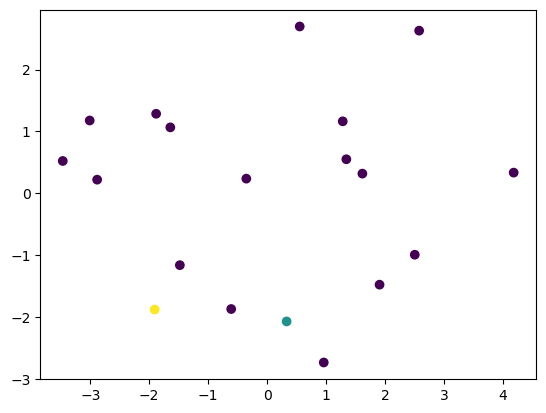

In [568]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=df_encoded_no_na['fighter1_result'])